# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count',
                  'synonyms_count', 'orthographic_density']
N_COMPONENTS = 3
BIN_COUNT = 4

Imports and database setup.

In [2]:
from itertools import product

import pandas as pd
import seaborn as sb
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=1)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id)\
        .filter(Substitution.model == model)
    print("Got {} substitutions for model {}"
          .format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = \
                substitution.features(feature, sentence_relative='median')
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'feature': feature,
                'source': source,
                'source_rel': source_rel,
                'destination': destination,
                'destination_rel': destination_rel,
                'h0': substitution.feature_average(feature),
                'h0_rel': substitution.feature_average(
                        feature, sentence_relative='median'),
                'h0n': substitution.feature_average(
                        feature, source_synonyms=True),
                'h0n_rel': substitution.feature_average(
                        feature, source_synonyms=True,
                        sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 5600 substitutions for model Model(time=Time.discrete, source=Source.all, past=Past.last_bin, durl=Durl.exclude_past, max_distance=1)


  0% (   0 of 5600) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   9 of 5600) |                       | Elapsed Time: 0:00:26 ETA: 4:29:26

  0% (  24 of 5600) |                       | Elapsed Time: 0:00:26 ETA: 1:41:34

  0% (  40 of 5600) |                       | Elapsed Time: 0:00:26 ETA: 1:01:16

  1% (  56 of 5600) |                       | Elapsed Time: 0:00:26 ETA: 0:43:59

  1% (  77 of 5600) |                       | Elapsed Time: 0:00:26 ETA: 0:01:13

  1% (  92 of 5600) |                       | Elapsed Time: 0:00:27 ETA: 0:01:16

  1% ( 106 of 5600) |                       | Elapsed Time: 0:00:27 ETA: 0:01:17

  2% ( 121 of 5600) |                       | Elapsed Time: 0:00:27 ETA: 0:01:17

  2% ( 140 of 5600) |                       | Elapsed Time: 0:00:27 ETA: 0:01:19

  2% ( 155 of 5600) |                       | Elapsed Time: 0:00:28 ETA: 0:01:17

  3% ( 170 of 5600) |                       | Elapsed Time: 0:00:28 ETA: 0:01:16

  3% ( 186 of 5600) |                       | Elapsed Time: 0:00:28 ETA: 0:01:14

  3% ( 202 of 5600) |                       | Elapsed Time: 0:00:28 ETA: 0:01:13

  3% ( 218 of 5600) |                       | Elapsed Time: 0:00:28 ETA: 0:01:12

  4% ( 234 of 5600) |                       | Elapsed Time: 0:00:29 ETA: 0:01:10

  4% ( 248 of 5600) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:12

  4% ( 265 of 5600) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:11

  5% ( 289 of 5600) |#                      | Elapsed Time: 0:00:29 ETA: 0:01:09

  5% ( 306 of 5600) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:07

  5% ( 324 of 5600) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:05

  6% ( 342 of 5600) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:03

  6% ( 358 of 5600) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:03

  6% ( 376 of 5600) |#                      | Elapsed Time: 0:00:30 ETA: 0:01:03

  7% ( 392 of 5600) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:04

  7% ( 407 of 5600) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:05

  7% ( 428 of 5600) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:06

  7% ( 444 of 5600) |#                      | Elapsed Time: 0:00:31 ETA: 0:01:07

  8% ( 460 of 5600) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:09

  8% ( 476 of 5600) |#                      | Elapsed Time: 0:00:32 ETA: 0:01:08

  8% ( 490 of 5600) |##                     | Elapsed Time: 0:00:32 ETA: 0:01:09

  9% ( 506 of 5600) |##                     | Elapsed Time: 0:00:32 ETA: 0:01:09

  9% ( 522 of 5600) |##                     | Elapsed Time: 0:00:32 ETA: 0:01:09

  9% ( 538 of 5600) |##                     | Elapsed Time: 0:00:33 ETA: 0:01:08

 10% ( 560 of 5600) |##                     | Elapsed Time: 0:00:33 ETA: 0:01:07

 10% ( 576 of 5600) |##                     | Elapsed Time: 0:00:33 ETA: 0:01:06

 10% ( 592 of 5600) |##                     | Elapsed Time: 0:00:33 ETA: 0:01:06

 10% ( 608 of 5600) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:06

 11% ( 630 of 5600) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:06

 11% ( 646 of 5600) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:05

 11% ( 662 of 5600) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:05

 12% ( 678 of 5600) |##                     | Elapsed Time: 0:00:34 ETA: 0:01:05

 12% ( 700 of 5600) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:05

 12% ( 716 of 5600) |##                     | Elapsed Time: 0:00:35 ETA: 0:01:04

 13% ( 732 of 5600) |###                    | Elapsed Time: 0:00:35 ETA: 0:01:04

 13% ( 748 of 5600) |###                    | Elapsed Time: 0:00:35 ETA: 0:01:04

 13% ( 770 of 5600) |###                    | Elapsed Time: 0:00:36 ETA: 0:01:03

 14% ( 786 of 5600) |###                    | Elapsed Time: 0:00:36 ETA: 0:01:03

 14% ( 802 of 5600) |###                    | Elapsed Time: 0:00:36 ETA: 0:01:03

 14% ( 818 of 5600) |###                    | Elapsed Time: 0:00:36 ETA: 0:01:02

 14% ( 832 of 5600) |###                    | Elapsed Time: 0:00:36 ETA: 0:01:03

 15% ( 848 of 5600) |###                    | Elapsed Time: 0:00:37 ETA: 0:01:03

 15% ( 864 of 5600) |###                    | Elapsed Time: 0:00:37 ETA: 0:01:02

 15% ( 881 of 5600) |###                    | Elapsed Time: 0:00:37 ETA: 0:01:02

 16% ( 898 of 5600) |###                    | Elapsed Time: 0:00:37 ETA: 0:01:01

 16% ( 917 of 5600) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:01

 16% ( 933 of 5600) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:01

 16% ( 949 of 5600) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:01

 17% ( 965 of 5600) |###                    | Elapsed Time: 0:00:38 ETA: 0:01:01

 17% ( 980 of 5600) |####                   | Elapsed Time: 0:00:38 ETA: 0:01:02

 17% ( 996 of 5600) |####                   | Elapsed Time: 0:00:39 ETA: 0:01:01

 18% (1011 of 5600) |####                   | Elapsed Time: 0:00:39 ETA: 0:01:01

 18% (1027 of 5600) |####                   | Elapsed Time: 0:00:39 ETA: 0:01:01

 18% (1050 of 5600) |####                   | Elapsed Time: 0:00:39 ETA: 0:01:00

 19% (1065 of 5600) |####                   | Elapsed Time: 0:00:40 ETA: 0:01:00

 19% (1081 of 5600) |####                   | Elapsed Time: 0:00:40 ETA: 0:00:59

 19% (1096 of 5600) |####                   | Elapsed Time: 0:00:40 ETA: 0:00:59

 20% (1120 of 5600) |####                   | Elapsed Time: 0:00:40 ETA: 0:00:59

 20% (1138 of 5600) |####                   | Elapsed Time: 0:00:40 ETA: 0:00:57

 20% (1155 of 5600) |####                   | Elapsed Time: 0:00:41 ETA: 0:00:57

 20% (1173 of 5600) |####                   | Elapsed Time: 0:00:41 ETA: 0:00:55

 21% (1190 of 5600) |####                   | Elapsed Time: 0:00:41 ETA: 0:00:54

 21% (1207 of 5600) |####                   | Elapsed Time: 0:00:41 ETA: 0:00:53

 21% (1225 of 5600) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:53

 22% (1243 of 5600) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:52

 22% (1260 of 5600) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:52

 22% (1278 of 5600) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:52

 23% (1296 of 5600) |#####                  | Elapsed Time: 0:00:42 ETA: 0:00:52

 23% (1313 of 5600) |#####                  | Elapsed Time: 0:00:43 ETA: 0:00:52

 23% (1338 of 5600) |#####                  | Elapsed Time: 0:00:43 ETA: 0:00:51

 24% (1356 of 5600) |#####                  | Elapsed Time: 0:00:43 ETA: 0:00:50

 24% (1374 of 5600) |#####                  | Elapsed Time: 0:00:43 ETA: 0:00:50

 24% (1390 of 5600) |#####                  | Elapsed Time: 0:00:44 ETA: 0:00:50

 25% (1407 of 5600) |#####                  | Elapsed Time: 0:00:44 ETA: 0:00:53

 25% (1421 of 5600) |#####                  | Elapsed Time: 0:00:44 ETA: 0:00:56

 25% (1435 of 5600) |#####                  | Elapsed Time: 0:00:44 ETA: 0:00:58

 25% (1451 of 5600) |#####                  | Elapsed Time: 0:00:44 ETA: 0:00:59

 26% (1470 of 5600) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:58

 26% (1487 of 5600) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:55

 26% (1503 of 5600) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:53

 27% (1519 of 5600) |######                 | Elapsed Time: 0:00:45 ETA: 0:00:51

 27% (1540 of 5600) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:51

 27% (1553 of 5600) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:53

 27% (1567 of 5600) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:54

 28% (1584 of 5600) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:54

 28% (1601 of 5600) |######                 | Elapsed Time: 0:00:46 ETA: 0:00:54

 28% (1619 of 5600) |######                 | Elapsed Time: 0:00:47 ETA: 0:00:53

 29% (1635 of 5600) |######                 | Elapsed Time: 0:00:47 ETA: 0:00:50

 29% (1649 of 5600) |######                 | Elapsed Time: 0:00:47 ETA: 0:00:51

 29% (1663 of 5600) |######                 | Elapsed Time: 0:00:47 ETA: 0:00:54

 29% (1670 of 5600) |######                 | Elapsed Time: 0:00:47 ETA: 0:00:55

 30% (1686 of 5600) |######                 | Elapsed Time: 0:00:48 ETA: 0:01:46

 30% (1703 of 5600) |######                 | Elapsed Time: 0:00:49 ETA: 0:01:44

 30% (1719 of 5600) |#######                | Elapsed Time: 0:00:49 ETA: 0:01:42

 30% (1735 of 5600) |#######                | Elapsed Time: 0:00:49 ETA: 0:01:39

 31% (1759 of 5600) |#######                | Elapsed Time: 0:00:49 ETA: 0:00:52

 31% (1774 of 5600) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:51

 31% (1790 of 5600) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:50

 32% (1807 of 5600) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:49

 32% (1828 of 5600) |#######                | Elapsed Time: 0:00:50 ETA: 0:00:49

 32% (1844 of 5600) |#######                | Elapsed Time: 0:00:51 ETA: 0:00:49

 33% (1860 of 5600) |#######                | Elapsed Time: 0:00:51 ETA: 0:00:48

 33% (1876 of 5600) |#######                | Elapsed Time: 0:00:51 ETA: 0:00:48

 33% (1899 of 5600) |#######                | Elapsed Time: 0:00:51 ETA: 0:00:47

 34% (1915 of 5600) |#######                | Elapsed Time: 0:00:51 ETA: 0:00:47

 34% (1933 of 5600) |#######                | Elapsed Time: 0:00:52 ETA: 0:00:46

 34% (1951 of 5600) |########               | Elapsed Time: 0:00:52 ETA: 0:00:44

 35% (1968 of 5600) |########               | Elapsed Time: 0:00:52 ETA: 0:00:43

 35% (1985 of 5600) |########               | Elapsed Time: 0:00:52 ETA: 0:00:43

 35% (2002 of 5600) |########               | Elapsed Time: 0:00:53 ETA: 0:00:43

 36% (2019 of 5600) |########               | Elapsed Time: 0:00:53 ETA: 0:00:44

 36% (2038 of 5600) |########               | Elapsed Time: 0:00:53 ETA: 0:00:44

 36% (2053 of 5600) |########               | Elapsed Time: 0:00:53 ETA: 0:00:45

 36% (2063 of 5600) |########               | Elapsed Time: 0:00:53 ETA: 0:00:55

 37% (2079 of 5600) |########               | Elapsed Time: 0:00:54 ETA: 0:00:56

 37% (2100 of 5600) |########               | Elapsed Time: 0:00:54 ETA: 0:00:54

 37% (2117 of 5600) |########               | Elapsed Time: 0:00:54 ETA: 0:00:52

 38% (2134 of 5600) |########               | Elapsed Time: 0:00:54 ETA: 0:00:42

 38% (2152 of 5600) |########               | Elapsed Time: 0:00:55 ETA: 0:00:41

 38% (2170 of 5600) |########               | Elapsed Time: 0:00:55 ETA: 0:00:40

 39% (2188 of 5600) |########               | Elapsed Time: 0:00:55 ETA: 0:00:40

 39% (2205 of 5600) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:40

 39% (2222 of 5600) |#########              | Elapsed Time: 0:00:55 ETA: 0:00:40

 40% (2240 of 5600) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:41

 40% (2258 of 5600) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:41

 40% (2272 of 5600) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:43

 40% (2288 of 5600) |#########              | Elapsed Time: 0:00:56 ETA: 0:00:43

 41% (2310 of 5600) |#########              | Elapsed Time: 0:00:57 ETA: 0:00:43

 41% (2327 of 5600) |#########              | Elapsed Time: 0:00:57 ETA: 0:00:44

 41% (2346 of 5600) |#########              | Elapsed Time: 0:00:57 ETA: 0:00:41

 42% (2365 of 5600) |#########              | Elapsed Time: 0:00:57 ETA: 0:00:39

 42% (2380 of 5600) |#########              | Elapsed Time: 0:00:57 ETA: 0:00:39

 42% (2397 of 5600) |#########              | Elapsed Time: 0:00:58 ETA: 0:00:39

 43% (2414 of 5600) |#########              | Elapsed Time: 0:00:58 ETA: 0:00:38

 43% (2430 of 5600) |#########              | Elapsed Time: 0:00:58 ETA: 0:00:39

 43% (2450 of 5600) |##########             | Elapsed Time: 0:00:58 ETA: 0:00:40

 44% (2467 of 5600) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:39

 44% (2485 of 5600) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:39

 44% (2500 of 5600) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:40

 45% (2520 of 5600) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:38

 45% (2534 of 5600) |##########             | Elapsed Time: 0:00:59 ETA: 0:00:40

 45% (2547 of 5600) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:42

 45% (2563 of 5600) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:42

 46% (2577 of 5600) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:42

 46% (2598 of 5600) |##########             | Elapsed Time: 0:01:00 ETA: 0:00:41

 46% (2616 of 5600) |##########             | Elapsed Time: 0:01:01 ETA: 0:00:38

 47% (2634 of 5600) |##########             | Elapsed Time: 0:01:01 ETA: 0:00:36

 47% (2660 of 5600) |##########             | Elapsed Time: 0:01:01 ETA: 0:00:35

 47% (2677 of 5600) |##########             | Elapsed Time: 0:01:01 ETA: 0:00:34

 48% (2703 of 5600) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:34

 48% (2723 of 5600) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:33

 48% (2738 of 5600) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:34

 49% (2754 of 5600) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:35

 49% (2771 of 5600) |###########            | Elapsed Time: 0:01:02 ETA: 0:00:34

 49% (2788 of 5600) |###########            | Elapsed Time: 0:01:03 ETA: 0:00:34

 50% (2809 of 5600) |###########            | Elapsed Time: 0:01:03 ETA: 0:00:35

 50% (2827 of 5600) |###########            | Elapsed Time: 0:01:03 ETA: 0:00:34

 50% (2845 of 5600) |###########            | Elapsed Time: 0:01:03 ETA: 0:00:34

 51% (2863 of 5600) |###########            | Elapsed Time: 0:01:04 ETA: 0:00:33

 51% (2879 of 5600) |###########            | Elapsed Time: 0:01:04 ETA: 0:00:34

 51% (2897 of 5600) |###########            | Elapsed Time: 0:01:04 ETA: 0:00:34

 52% (2915 of 5600) |###########            | Elapsed Time: 0:01:04 ETA: 0:00:33

 52% (2940 of 5600) |############           | Elapsed Time: 0:01:04 ETA: 0:00:33

 52% (2958 of 5600) |############           | Elapsed Time: 0:01:05 ETA: 0:00:31

 53% (2976 of 5600) |############           | Elapsed Time: 0:01:05 ETA: 0:00:31

 53% (2994 of 5600) |############           | Elapsed Time: 0:01:05 ETA: 0:00:31

 53% (3017 of 5600) |############           | Elapsed Time: 0:01:05 ETA: 0:00:31

 54% (3033 of 5600) |############           | Elapsed Time: 0:01:06 ETA: 0:00:31

 54% (3049 of 5600) |############           | Elapsed Time: 0:01:06 ETA: 0:00:32

 54% (3065 of 5600) |############           | Elapsed Time: 0:01:06 ETA: 0:00:32

 55% (3089 of 5600) |############           | Elapsed Time: 0:01:06 ETA: 0:00:32

 55% (3106 of 5600) |############           | Elapsed Time: 0:01:07 ETA: 0:00:31

 55% (3123 of 5600) |############           | Elapsed Time: 0:01:07 ETA: 0:00:31

 56% (3140 of 5600) |############           | Elapsed Time: 0:01:07 ETA: 0:00:30

 56% (3157 of 5600) |############           | Elapsed Time: 0:01:07 ETA: 0:00:31

 56% (3175 of 5600) |#############          | Elapsed Time: 0:01:07 ETA: 0:00:31

 57% (3193 of 5600) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:30

 57% (3211 of 5600) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:30

 57% (3229 of 5600) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:29

 57% (3247 of 5600) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:28

 58% (3263 of 5600) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:28

 58% (3281 of 5600) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:28

 58% (3299 of 5600) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:28

 59% (3317 of 5600) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:28

 59% (3334 of 5600) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:27

 59% (3352 of 5600) |#############          | Elapsed Time: 0:01:10 ETA: 0:00:27

 60% (3369 of 5600) |#############          | Elapsed Time: 0:01:10 ETA: 0:00:26

 60% (3385 of 5600) |#############          | Elapsed Time: 0:01:10 ETA: 0:00:27

 60% (3401 of 5600) |#############          | Elapsed Time: 0:01:10 ETA: 0:00:27

 61% (3418 of 5600) |##############         | Elapsed Time: 0:01:10 ETA: 0:00:27

 61% (3439 of 5600) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:27

 61% (3457 of 5600) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:27

 62% (3474 of 5600) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:26

 62% (3490 of 5600) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:26

 62% (3509 of 5600) |##############         | Elapsed Time: 0:01:12 ETA: 0:00:25

 62% (3527 of 5600) |##############         | Elapsed Time: 0:01:12 ETA: 0:00:25

 63% (3541 of 5600) |##############         | Elapsed Time: 0:01:12 ETA: 0:00:25

 63% (3558 of 5600) |##############         | Elapsed Time: 0:01:12 ETA: 0:00:26

 63% (3578 of 5600) |##############         | Elapsed Time: 0:01:12 ETA: 0:00:25

 64% (3596 of 5600) |##############         | Elapsed Time: 0:01:13 ETA: 0:00:25

 64% (3614 of 5600) |##############         | Elapsed Time: 0:01:13 ETA: 0:00:24

 64% (3632 of 5600) |##############         | Elapsed Time: 0:01:13 ETA: 0:00:24

 65% (3647 of 5600) |##############         | Elapsed Time: 0:01:13 ETA: 0:00:24

 65% (3664 of 5600) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:23

 65% (3680 of 5600) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:24

 66% (3697 of 5600) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:24

 66% (3717 of 5600) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:24

 66% (3734 of 5600) |###############        | Elapsed Time: 0:01:14 ETA: 0:00:24

 66% (3751 of 5600) |###############        | Elapsed Time: 0:01:15 ETA: 0:00:23

 67% (3767 of 5600) |###############        | Elapsed Time: 0:01:15 ETA: 0:00:23

 67% (3789 of 5600) |###############        | Elapsed Time: 0:01:15 ETA: 0:00:23

 67% (3807 of 5600) |###############        | Elapsed Time: 0:01:15 ETA: 0:00:22

 68% (3824 of 5600) |###############        | Elapsed Time: 0:01:16 ETA: 0:00:22

 68% (3841 of 5600) |###############        | Elapsed Time: 0:01:16 ETA: 0:00:21

 68% (3859 of 5600) |###############        | Elapsed Time: 0:01:16 ETA: 0:00:21

 69% (3877 of 5600) |###############        | Elapsed Time: 0:01:16 ETA: 0:00:20

 69% (3895 of 5600) |###############        | Elapsed Time: 0:01:16 ETA: 0:00:20

 70% (3920 of 5600) |################       | Elapsed Time: 0:01:17 ETA: 0:00:19

 70% (3935 of 5600) |################       | Elapsed Time: 0:01:17 ETA: 0:00:20

 70% (3953 of 5600) |################       | Elapsed Time: 0:01:17 ETA: 0:00:20

 70% (3971 of 5600) |################       | Elapsed Time: 0:01:17 ETA: 0:00:19

 71% (3990 of 5600) |################       | Elapsed Time: 0:01:18 ETA: 0:00:19

 71% (4006 of 5600) |################       | Elapsed Time: 0:01:18 ETA: 0:00:19

 71% (4023 of 5600) |################       | Elapsed Time: 0:01:18 ETA: 0:00:19

 72% (4040 of 5600) |################       | Elapsed Time: 0:01:18 ETA: 0:00:19

 72% (4060 of 5600) |################       | Elapsed Time: 0:01:18 ETA: 0:00:19

 72% (4077 of 5600) |################       | Elapsed Time: 0:01:19 ETA: 0:00:18

 73% (4093 of 5600) |################       | Elapsed Time: 0:01:19 ETA: 0:00:18

 73% (4110 of 5600) |################       | Elapsed Time: 0:01:19 ETA: 0:00:18

 73% (4130 of 5600) |################       | Elapsed Time: 0:01:19 ETA: 0:00:18

 74% (4147 of 5600) |#################      | Elapsed Time: 0:01:20 ETA: 0:00:17

 74% (4164 of 5600) |#################      | Elapsed Time: 0:01:20 ETA: 0:00:17

 74% (4179 of 5600) |#################      | Elapsed Time: 0:01:20 ETA: 0:00:17

 74% (4193 of 5600) |#################      | Elapsed Time: 0:01:20 ETA: 0:00:18

 75% (4208 of 5600) |#################      | Elapsed Time: 0:01:20 ETA: 0:00:18

 75% (4225 of 5600) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:18

 75% (4243 of 5600) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:18

 76% (4259 of 5600) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:17

 76% (4278 of 5600) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:16

 76% (4293 of 5600) |#################      | Elapsed Time: 0:01:21 ETA: 0:00:16

 76% (4308 of 5600) |#################      | Elapsed Time: 0:01:22 ETA: 0:00:17

 77% (4325 of 5600) |#################      | Elapsed Time: 0:01:22 ETA: 0:00:17

 77% (4348 of 5600) |#################      | Elapsed Time: 0:01:22 ETA: 0:00:17

 77% (4364 of 5600) |#################      | Elapsed Time: 0:01:22 ETA: 0:00:16

 78% (4382 of 5600) |#################      | Elapsed Time: 0:01:23 ETA: 0:00:15

 78% (4398 of 5600) |##################     | Elapsed Time: 0:01:23 ETA: 0:00:15

 78% (4417 of 5600) |##################     | Elapsed Time: 0:01:23 ETA: 0:00:15

 79% (4433 of 5600) |##################     | Elapsed Time: 0:01:23 ETA: 0:00:15

 79% (4447 of 5600) |##################     | Elapsed Time: 0:01:24 ETA: 0:00:16

 79% (4463 of 5600) |##################     | Elapsed Time: 0:01:24 ETA: 0:00:15

 80% (4480 of 5600) |##################     | Elapsed Time: 0:01:24 ETA: 0:00:15

 80% (4497 of 5600) |##################     | Elapsed Time: 0:01:24 ETA: 0:00:15

 80% (4513 of 5600) |##################     | Elapsed Time: 0:01:24 ETA: 0:00:14

 80% (4530 of 5600) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:14

 81% (4550 of 5600) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:13

 81% (4567 of 5600) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:13

 81% (4583 of 5600) |##################     | Elapsed Time: 0:01:25 ETA: 0:00:13

 82% (4601 of 5600) |##################     | Elapsed Time: 0:01:26 ETA: 0:00:12

 82% (4620 of 5600) |##################     | Elapsed Time: 0:01:26 ETA: 0:00:12

 82% (4637 of 5600) |###################    | Elapsed Time: 0:01:26 ETA: 0:00:11

 83% (4655 of 5600) |###################    | Elapsed Time: 0:01:26 ETA: 0:00:11

 83% (4673 of 5600) |###################    | Elapsed Time: 0:01:26 ETA: 0:00:11

 83% (4690 of 5600) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:11

 84% (4707 of 5600) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:11

 84% (4724 of 5600) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:11

 84% (4742 of 5600) |###################    | Elapsed Time: 0:01:27 ETA: 0:00:10

 85% (4760 of 5600) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:10

 85% (4776 of 5600) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:10

 85% (4791 of 5600) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:10

 85% (4807 of 5600) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:10

 86% (4821 of 5600) |###################    | Elapsed Time: 0:01:28 ETA: 0:00:10

 86% (4839 of 5600) |###################    | Elapsed Time: 0:01:29 ETA: 0:00:10

 86% (4848 of 5600) |###################    | Elapsed Time: 0:01:29 ETA: 0:00:10

 86% (4862 of 5600) |###################    | Elapsed Time: 0:01:30 ETA: 0:00:20

 87% (4877 of 5600) |####################   | Elapsed Time: 0:01:30 ETA: 0:00:20

 87% (4900 of 5600) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:19

 87% (4916 of 5600) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:18

 88% (4931 of 5600) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:09

 88% (4948 of 5600) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:08

 88% (4970 of 5600) |####################   | Elapsed Time: 0:01:31 ETA: 0:00:08

 89% (4986 of 5600) |####################   | Elapsed Time: 0:01:32 ETA: 0:00:08

 89% (5004 of 5600) |####################   | Elapsed Time: 0:01:32 ETA: 0:00:07

 89% (5020 of 5600) |####################   | Elapsed Time: 0:01:32 ETA: 0:00:07

 90% (5040 of 5600) |####################   | Elapsed Time: 0:01:32 ETA: 0:00:06

 90% (5058 of 5600) |####################   | Elapsed Time: 0:01:33 ETA: 0:00:06

 90% (5074 of 5600) |####################   | Elapsed Time: 0:01:33 ETA: 0:00:06

 90% (5089 of 5600) |####################   | Elapsed Time: 0:01:33 ETA: 0:00:06

 91% (5110 of 5600) |####################   | Elapsed Time: 0:01:33 ETA: 0:00:06

 91% (5126 of 5600) |#####################  | Elapsed Time: 0:01:33 ETA: 0:00:06

 91% (5141 of 5600) |#####################  | Elapsed Time: 0:01:34 ETA: 0:00:06

 92% (5159 of 5600) |#####################  | Elapsed Time: 0:01:34 ETA: 0:00:05

 92% (5180 of 5600) |#####################  | Elapsed Time: 0:01:34 ETA: 0:00:05

 92% (5196 of 5600) |#####################  | Elapsed Time: 0:01:34 ETA: 0:00:05

 93% (5212 of 5600) |#####################  | Elapsed Time: 0:01:35 ETA: 0:00:05

 93% (5228 of 5600) |#####################  | Elapsed Time: 0:01:35 ETA: 0:00:04

 93% (5250 of 5600) |#####################  | Elapsed Time: 0:01:35 ETA: 0:00:04

 94% (5268 of 5600) |#####################  | Elapsed Time: 0:01:35 ETA: 0:00:04

 94% (5286 of 5600) |#####################  | Elapsed Time: 0:01:35 ETA: 0:00:03

 94% (5303 of 5600) |#####################  | Elapsed Time: 0:01:36 ETA: 0:00:03

 95% (5320 of 5600) |#####################  | Elapsed Time: 0:01:36 ETA: 0:00:03

 95% (5336 of 5600) |#####################  | Elapsed Time: 0:01:36 ETA: 0:00:03

 95% (5354 of 5600) |#####################  | Elapsed Time: 0:01:36 ETA: 0:00:03

 95% (5371 of 5600) |###################### | Elapsed Time: 0:01:37 ETA: 0:00:02

 96% (5390 of 5600) |###################### | Elapsed Time: 0:01:37 ETA: 0:00:02

 96% (5407 of 5600) |###################### | Elapsed Time: 0:01:37 ETA: 0:00:02

 96% (5424 of 5600) |###################### | Elapsed Time: 0:01:37 ETA: 0:00:02

 97% (5441 of 5600) |###################### | Elapsed Time: 0:01:37 ETA: 0:00:02

 97% (5460 of 5600) |###################### | Elapsed Time: 0:01:38 ETA: 0:00:01

 97% (5477 of 5600) |###################### | Elapsed Time: 0:01:38 ETA: 0:00:01

 98% (5493 of 5600) |###################### | Elapsed Time: 0:01:38 ETA: 0:00:01

 98% (5508 of 5600) |###################### | Elapsed Time: 0:01:38 ETA: 0:00:01

 98% (5530 of 5600) |###################### | Elapsed Time: 0:01:39 ETA: 0:00:00

 99% (5547 of 5600) |###################### | Elapsed Time: 0:01:39 ETA: 0:00:00

 99% (5562 of 5600) |###################### | Elapsed Time: 0:01:39 ETA: 0:00:00

 99% (5577 of 5600) |###################### | Elapsed Time: 0:01:39 ETA: 0:00:00

 99% (5591 of 5600) |###################### | Elapsed Time: 0:01:39 ETA: 0:00:00

100% (5600 of 5600) |######################| Elapsed Time: 0:01:40 Time: 0:01:40


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'feature'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

Prepare feature ordering.

In [5]:
ordered_features = sorted(
    Substitution.__features__,
    key=lambda f: Substitution._transformed_feature(f).__doc__
)

### What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the average feature of an appearing word upon substitution, as a function of the feature of the disappearing word:
$$\nu_{\phi}(f) = \left< \phi(w') \right>_{\{w \rightarrow w' | \phi(w) = f \}}$$
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the average sentence-relative feature of an appearing word upon substitution as a function of the sentence-relative feature of the disappearing word, i.e. $\phi($destination$) - \phi($destination sentence$)$ as a function of $\phi($source$) - \phi($source sentence$)$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted with fixed-width bins, then quantile bins, with absolute feature values, then with relative-to-sentence features.

In [6]:
def print_significance(name, bins, h0, h0n, values):
    bin_count = bins.max() + 1
    print()
    print('-' * len(name))
    print(name)
    print('-' * len(name))
    header = ('Bin  |   '
              + ' |   '.join(map(str, range(1, bin_count + 1)))
              + ' |')
    print(header)
    print('-' * len(header))
    
    for null_name, nulls in [('H_0 ', h0), ('H_00', h0n)]:
        bin_values = np.zeros(bin_count)
        bin_nulls = np.zeros(bin_count)
        cis = np.zeros((bin_count, 3))

        for i in range(bin_count):
            indices = bins == i
            n = (indices).sum()
            s = values[indices].std(ddof=1)

            bin_values[i] = values[indices].mean()
            bin_nulls[i] = nulls[indices].mean()
            for j, alpha in enumerate([.05, .01, .001]):
                cis[i, j] = (stats.t.ppf(1 - alpha/2, n - 1)
                             * values[indices].std(ddof=1)
                             / np.sqrt(n - 1))

        print(null_name + ' |', end='')
        differences = ((bin_values[:,np.newaxis]
                        < bin_nulls[:,np.newaxis] - cis)
                       | (bin_values[:,np.newaxis]
                          > bin_nulls[:,np.newaxis] + cis))
        for i in range(bin_count):
            if differences[i].any():
                n_stars = np.where(differences[i])[0].max()
                bin_stars = '*' * (1 + n_stars) + ' ' * (2 - n_stars)
            else:
                bin_stars = 'ns.'
            print(' ' + bin_stars + ' |', end='')
        print()

In [7]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    quantiles = kwargs.get('quantiles', False)
    feature_field = kwargs.get('feature_field', 'feature')
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color,
             label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.',
             color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted',
             color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

    # Test for statistical significance
    print_significance(str(data.iloc[0][feature_field]),
                       x_bins, h0, h0n, y)

In [8]:
def plot_grid(data, features, filename,
              plot_function, xlabel, ylabel,
              feature_field='feature', plot_kws={}):
    g = sb.FacetGrid(data=data[data[feature_field]
                               .map(lambda f: f in features)],
                     sharex=False, sharey=False,
                     col=feature_field, hue=feature_field,
                     col_order=features, hue_order=features,
                     col_wrap=3, aspect=1.5, size=3)
    g.map_dataframe(plot_function, **plot_kws)
    g.set_titles('{col_name}')
    g.set_xlabels(xlabel)
    g.set_ylabels(ylabel)
    for ax in g.axes.ravel():
        legend = ax.legend(frameon=True, loc='best')
        if not legend:
            # Skip if nothing was plotted on these axes.
            continue
        frame = legend.get_frame()
        frame.set_facecolor('#f2f2f2')
        frame.set_edgecolor('#000000')
        ax.set_title(Substitution._transformed_feature(ax.get_title())
                     .__doc__)
    if SAVE_FIGURES:
        g.fig.savefig(settings.FIGURE.format(filename),
                      bbox_inches='tight', dpi=300)

In [9]:
def plot_bias(ax, data, color, ci=True, relative=False, quantiles=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    cut, cut_kws = ((pd.qcut, {}) if quantiles
                    else (pd.cut, {'right': False}))
    for bin_count in range(BIN_COUNT, 0, -1):
        try:
            x_bins, bins = cut(x, bin_count, labels=False,
                               retbins=True, **cut_kws)
            break
        except ValueError:
            pass
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        indices = x_bins == i
        n = indices.sum()
        h0s[i] = h0[indices].mean()
        h0ns[i] = h0n[indices].mean()
        values[i] = y[indices].mean()
        cis[i] = (stats.t.ppf(.975, n - 1) * y[indices].std(ddof=1)
                  / np.sqrt(n - 1))
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count),
            (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale,
                        (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

In [10]:
def plot_overlay(data, features, filename, palette_name,
                 plot_function, title, xlabel, ylabel, plot_kws={}):
    palette = sb.color_palette(palette_name, len(features))
    fig, ax = plt.subplots(figsize=(12, 6))
    for j, feature in enumerate(features):
        plot_function(ax, data[data.feature == feature].dropna(),
                      color=palette[j], **plot_kws)
    ax.legend(loc='lower right')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if SAVE_FIGURES:
        fig.savefig(settings.FIGURE.format(filename),
                    bbox_inches='tight', dpi=300)
    return ax

### 2.1 Global feature values

#### 2.1.1 Bins of distribution of appeared global feature values

For each feature $\phi$, we plot the variation upon substitution as explained above


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *   | ns. | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *   | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *   | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | **  | **  | *   |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | **  | *** |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *   | ns. |
H_00 | ns. | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | *   | **  | *** | ns. |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |


H_00 | ns. | *** | *** | *   |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | **  |
H_00 | **  | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |
H_00 | ns. | *** | **  | ns. |



--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | **  | ns. | ns. | *   |


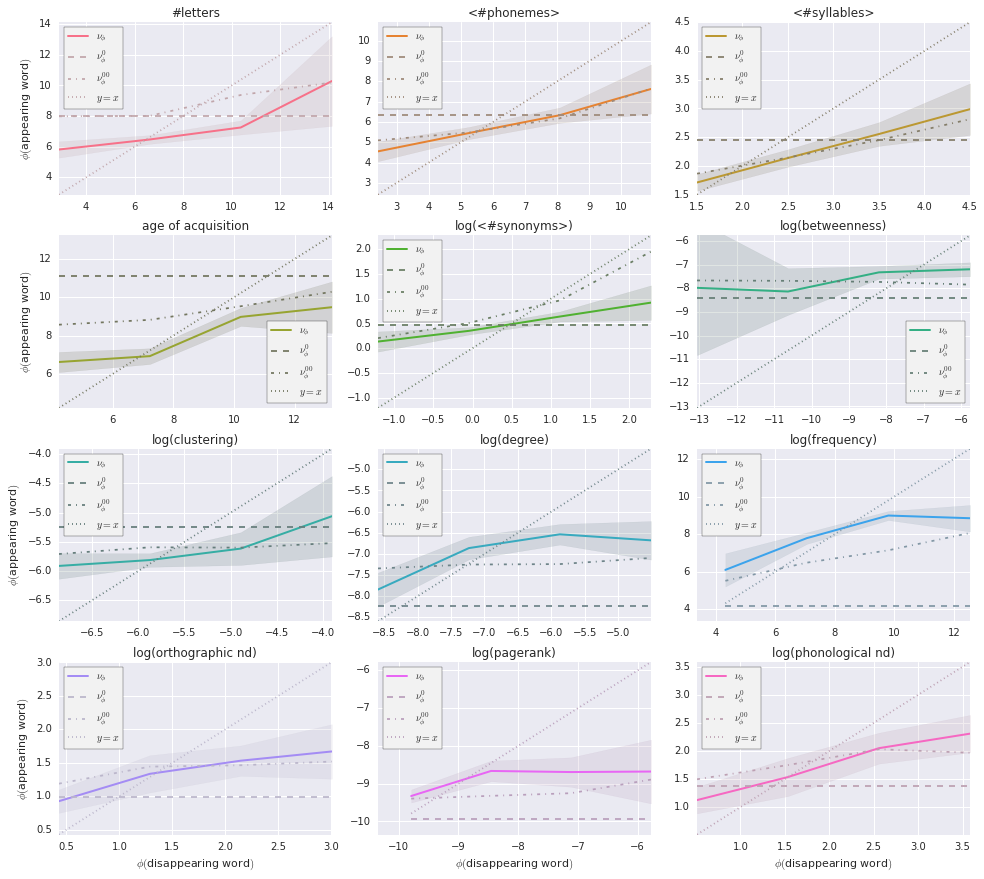

In [11]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

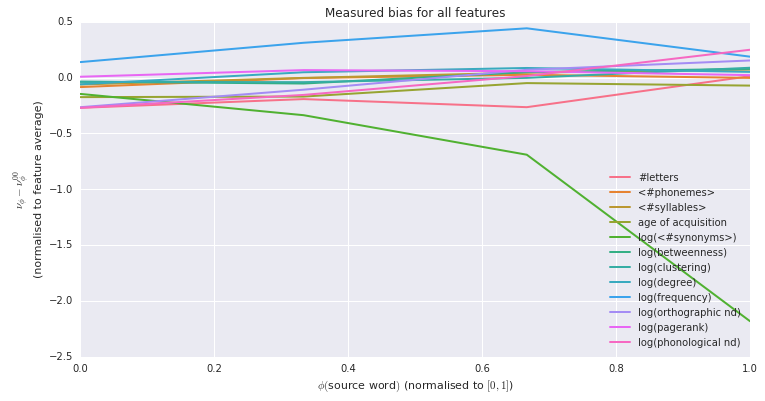

In [12]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | *   |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *   | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *   | ns. |
H_00 | ns. | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | **  | **  | *   |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *   | *** | **  |
H_00 | **  | ns. | ns. | ns. |


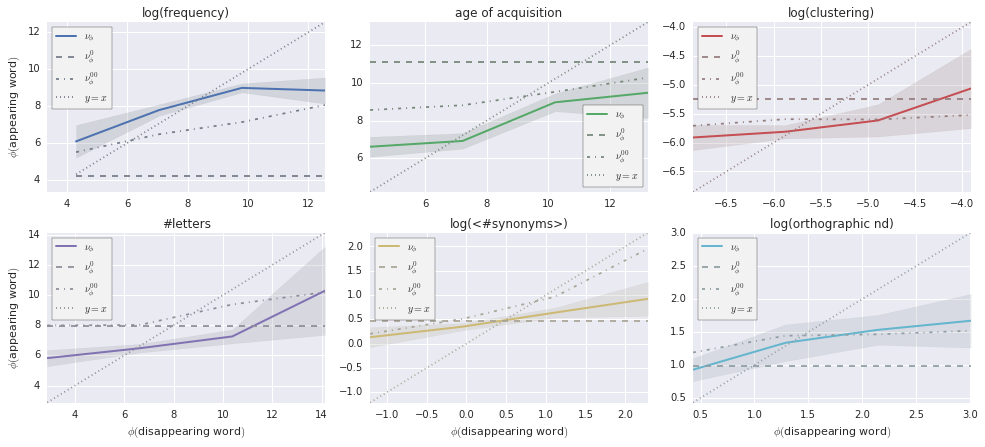

In [13]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$')

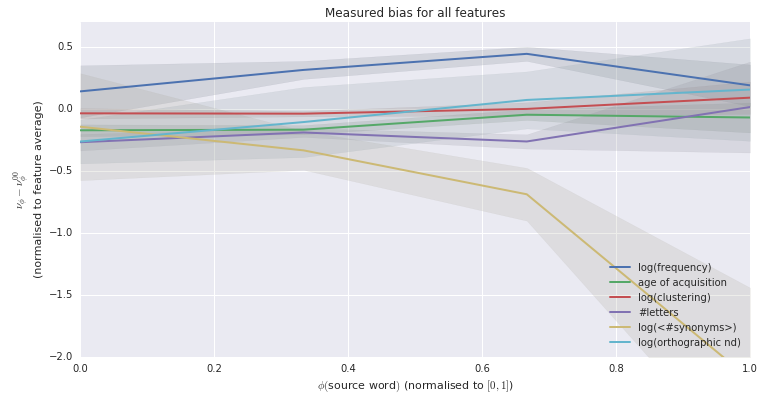

In [14]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)')\
    .set_ylim(-2, .7);

#### 2.1.2 Quantiles of distribution of appeared global feature values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | *   |
H_00 | *   | *   | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | *** | *** | *   |
H_00 | *   | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *   | ns. | *** |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | **  |


H_00 | *   | *   | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | **  | *** | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |



--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | ns. | **  | *** |
H_00 | **  | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |
H_00 | ns. | ns. | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | ns. | *** | *** |
H_00 | **  | ns. | ns. | *   |


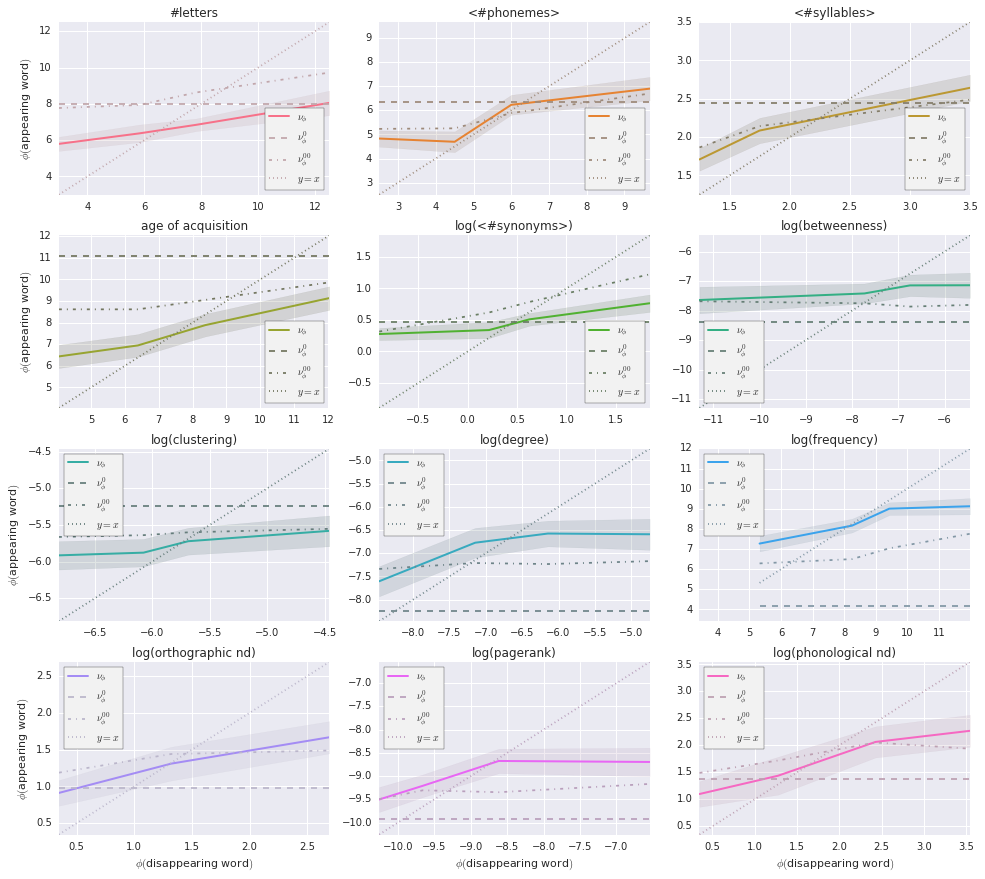

In [15]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

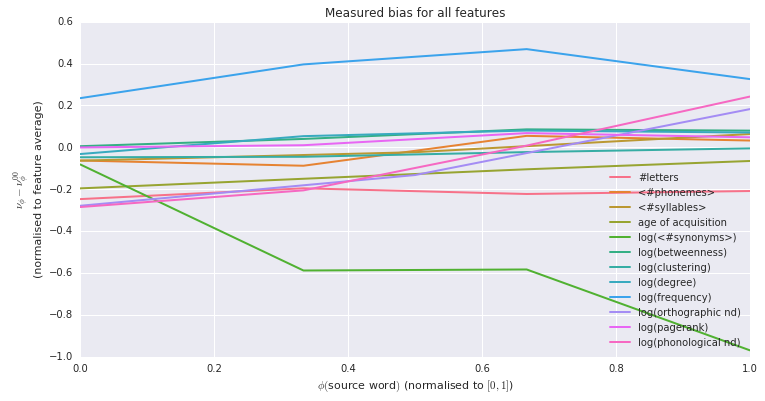

In [16]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_global',
             'husl', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'ci': False, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | **  |
H_00 | *   | *   | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *   | ns. | *** |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |
------------------------
H_0  | ns. | **  | *** |
H_00 | **  | ns. | ns. |


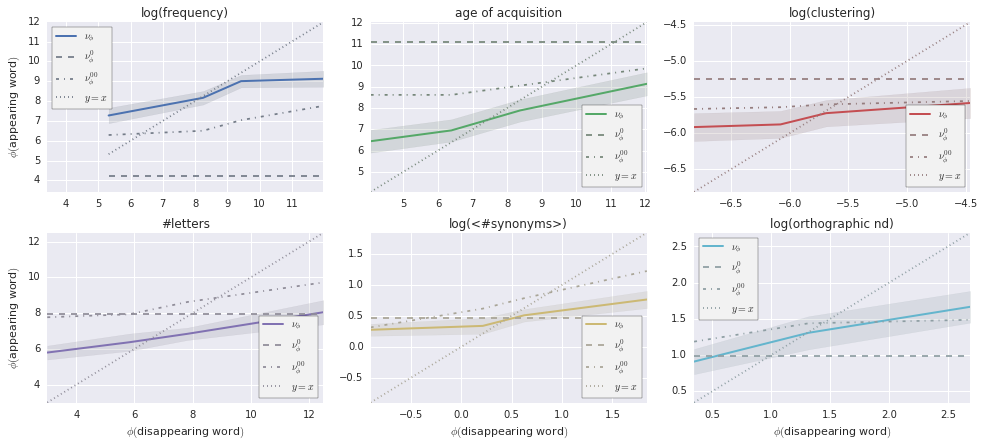

In [17]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_global', plot_variation,
          r'$\phi($disappearing word$)$', r'$\phi($appearing word$)$',
          plot_kws={'quantiles': True})

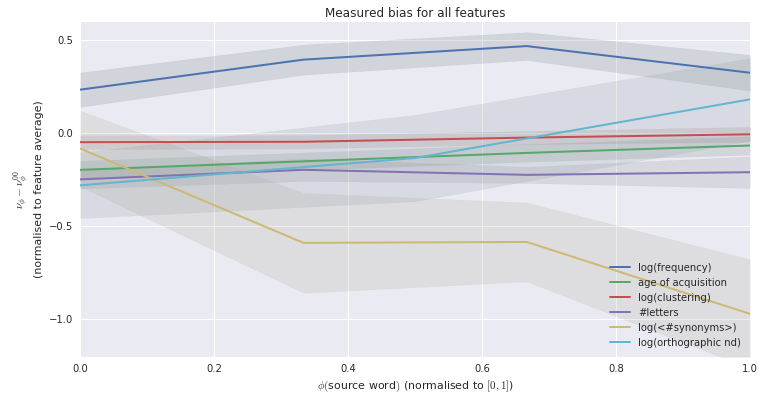

In [18]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_global',
             'deep', plot_bias, 'Measured bias for all features',
             r'$\phi($source word$)$ (normalised to $[0, 1]$)',
             r'$\nu_{\phi} - \nu_{\phi}^{00}$'
                 '\n(normalised to feature average)',
             plot_kws={'quantiles': True})\
    .set_ylim(-1.2, .6);

### 2.2 Sentence-relative feature values

#### 2.2.1 Bins of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | *   | ns. | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | **  | **  |
H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | *   | *** | ns. |
H_00 | ns. | *** | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | **  |
H_00 | ns. | ns. | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | ns. |
H_00 | ns. | *   | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | **  | ns. | *** | **  |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |


H_00 | ns. | **  | *** | ns. |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | ns. | ns. | ns. |


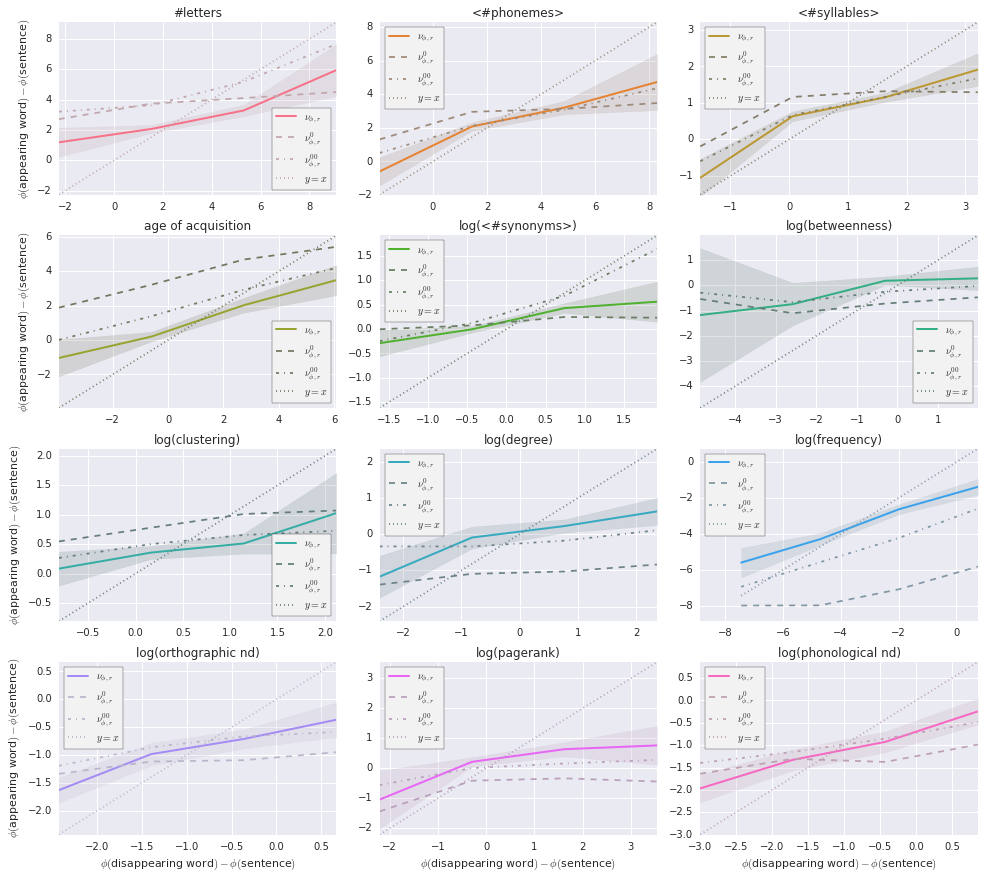

In [19]:
plot_grid(variations, ordered_features,
          'all-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

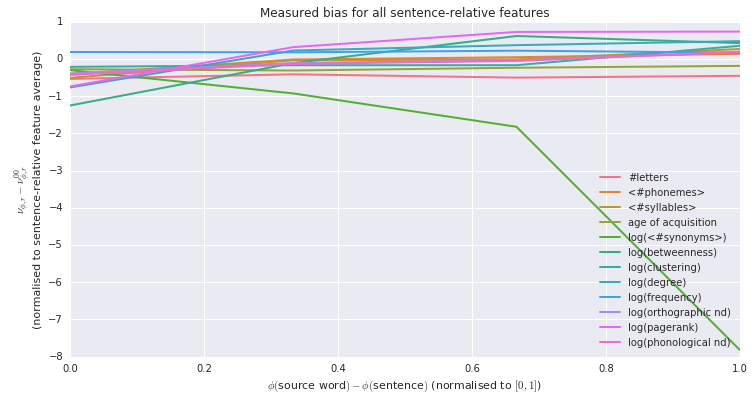

In [20]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-fixedbins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | **  | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *** | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | **  | *** | *** | ns. |
H_00 | ns. | *   | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | ns. |
H_00 | *** | *** | *** | ns. |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *   | *   | *** | ns. |
H_00 | ns. | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | ns. | ns. | ns. |


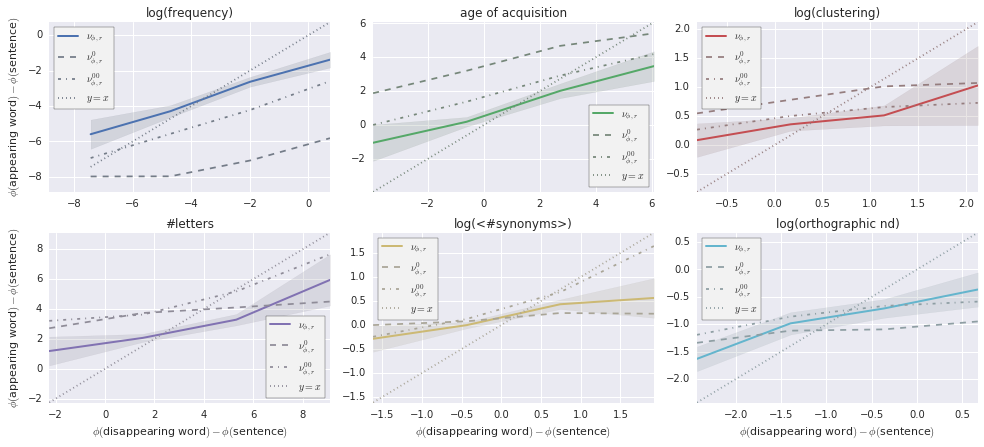

In [21]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-fixedbins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True})

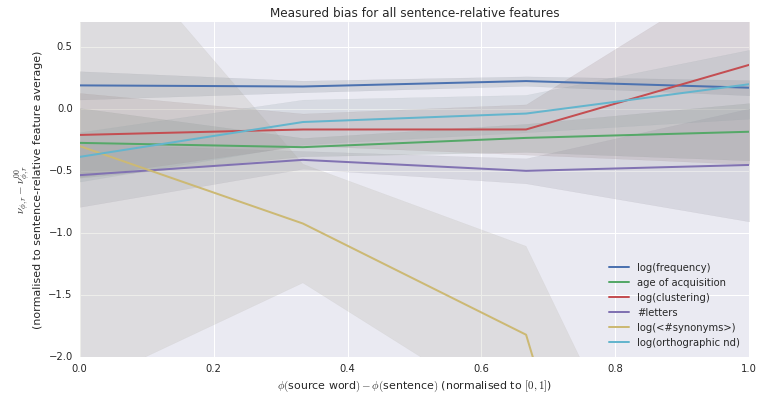

In [22]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-fixedbins_sentencerel',
             'deep', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True})\
    .set_ylim(-2, .7);

#### 2.2.2 Quantiles of distribution of appeared sentence-relative values


-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
phonemes_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *   | *   |
H_00 | ns. | ns. | ns. | ns. |



---------------
syllables_count
---------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | ns. | ns. |
H_00 | ns. | ns. | ns. | ns. |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |



--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | ns. | ns. | *** |
H_00 | *   | ns. | *** | *** |

-----------
betweenness
-----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | ns. | ns. | *** | ns. |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | *** |
H_00 | ns. | *** | ns. | ns. |

------
degree
------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | ns. | *   | **  | *** |

---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | ns. | ns. | ns. |

--------
pagerank
--------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | *** |


H_00 | ns. | ns. | *** | **  |

--------------------
phonological_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | **  | *** |
H_00 | *** | ns. | ns. | ns. |


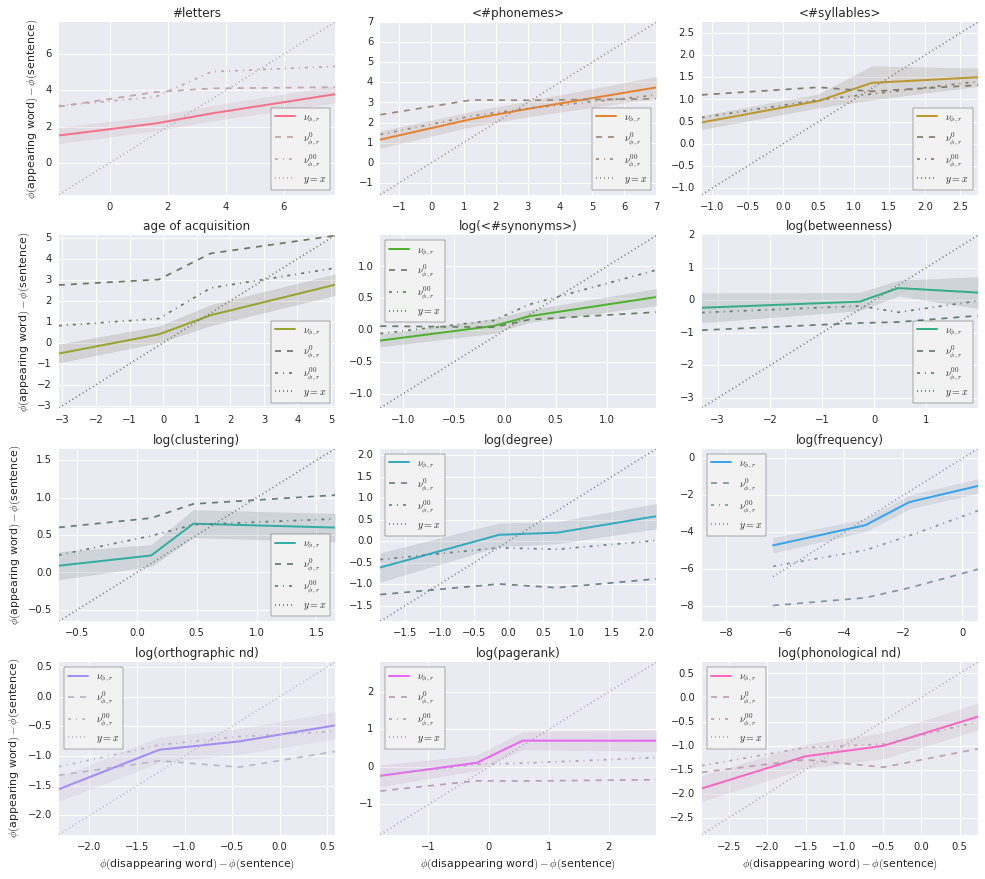

In [23]:
plot_grid(variations, ordered_features,
          'all-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

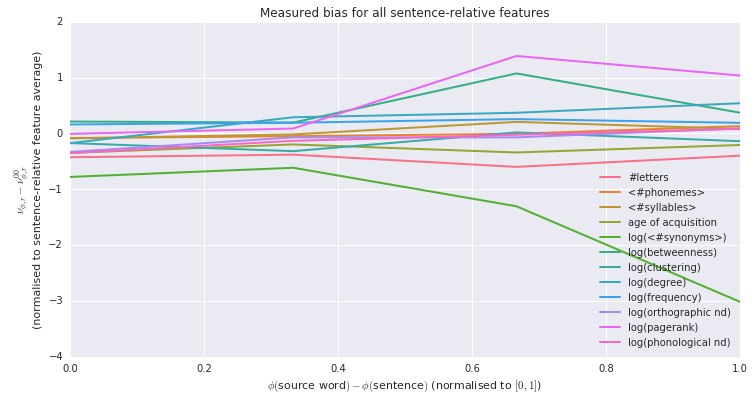

In [24]:
plot_overlay(variations, ordered_features,
             'all-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'ci': False, 'relative': True, 'quantiles': True});


---------
frequency
---------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | *** |

---
aoa
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *** |
H_00 | *** | *** | *** | **  |

----------
clustering
----------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | *** | **  | *** |
H_00 | ns. | *** | ns. | ns. |

-------------
letters_count
-------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | ns. |
H_00 | *** | *** | *** | *** |

--------------
synonyms_count
--------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------


H_0  | *** | ns. | ns. | *** |
H_00 | *   | ns. | *** | *** |

--------------------
orthographic_density
--------------------
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *   | ns. | *** | *** |
H_00 | *** | ns. | ns. | ns. |


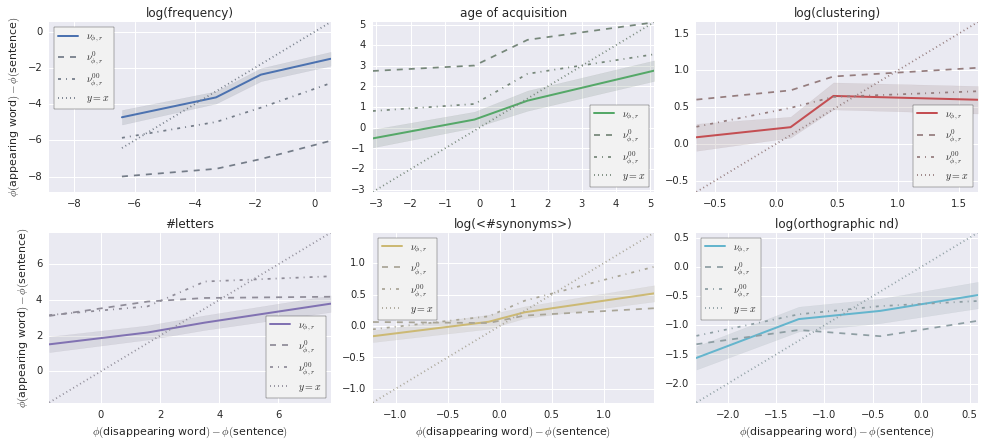

In [25]:
plot_grid(variations, PAPER_FEATURES,
          'paper-variations-quantilebins_sentencerel', plot_variation,
          r'$\phi($disappearing word$) - \phi($sentence$)$',
          r'$\phi($appearing word$) - \phi($sentence$)$',
          plot_kws={'relative': True, 'quantiles': True})

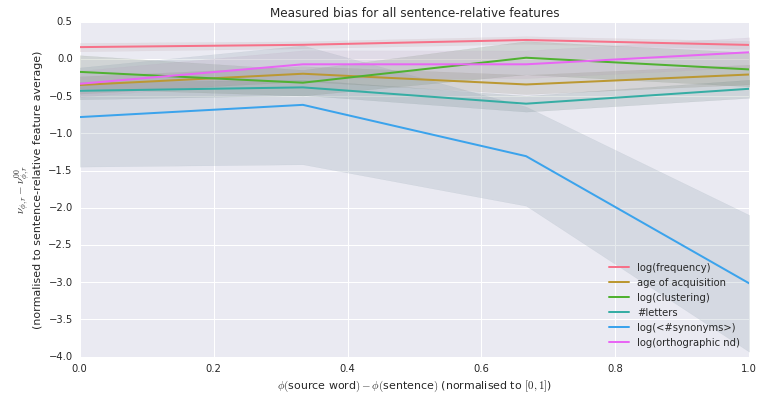

In [26]:
plot_overlay(variations, PAPER_FEATURES,
             'paper-variations_bias-quantilebins_sentencerel',
             'husl', plot_bias,
             'Measured bias for all sentence-relative features',
             r'$\phi($source word$) - \phi($sentence$)$'
                 r' (normalised to $[0, 1]$)',
             r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$'
                 '\n(normalised to sentence-relative feature average)',
             plot_kws={'relative': True, 'quantiles': True});

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [27]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count,
                               right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count,
                               right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (
                dest[(x_bins == x) & (y_bins == y)] -
                source[(x_bins == x) & (y_bins == y)]
            ).mean()
            v_values[y, x] = (
                dest_rel[(x_bins == x) & (y_bins == y)] -
                source_rel[(x_bins == x) & (y_bins == y)]
            ).mean()
            strength[y, x] = np.sqrt(
                (dest[(x_bins == x) & (y_bins == y)] - 
                 source[(x_bins == x) & (y_bins == y)]) ** 2 +
                (dest_rel[(x_bins == x) & (y_bins == y)] - 
                 source_rel[(x_bins == x) & (y_bins == y)]) ** 2
            ).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), 
             label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


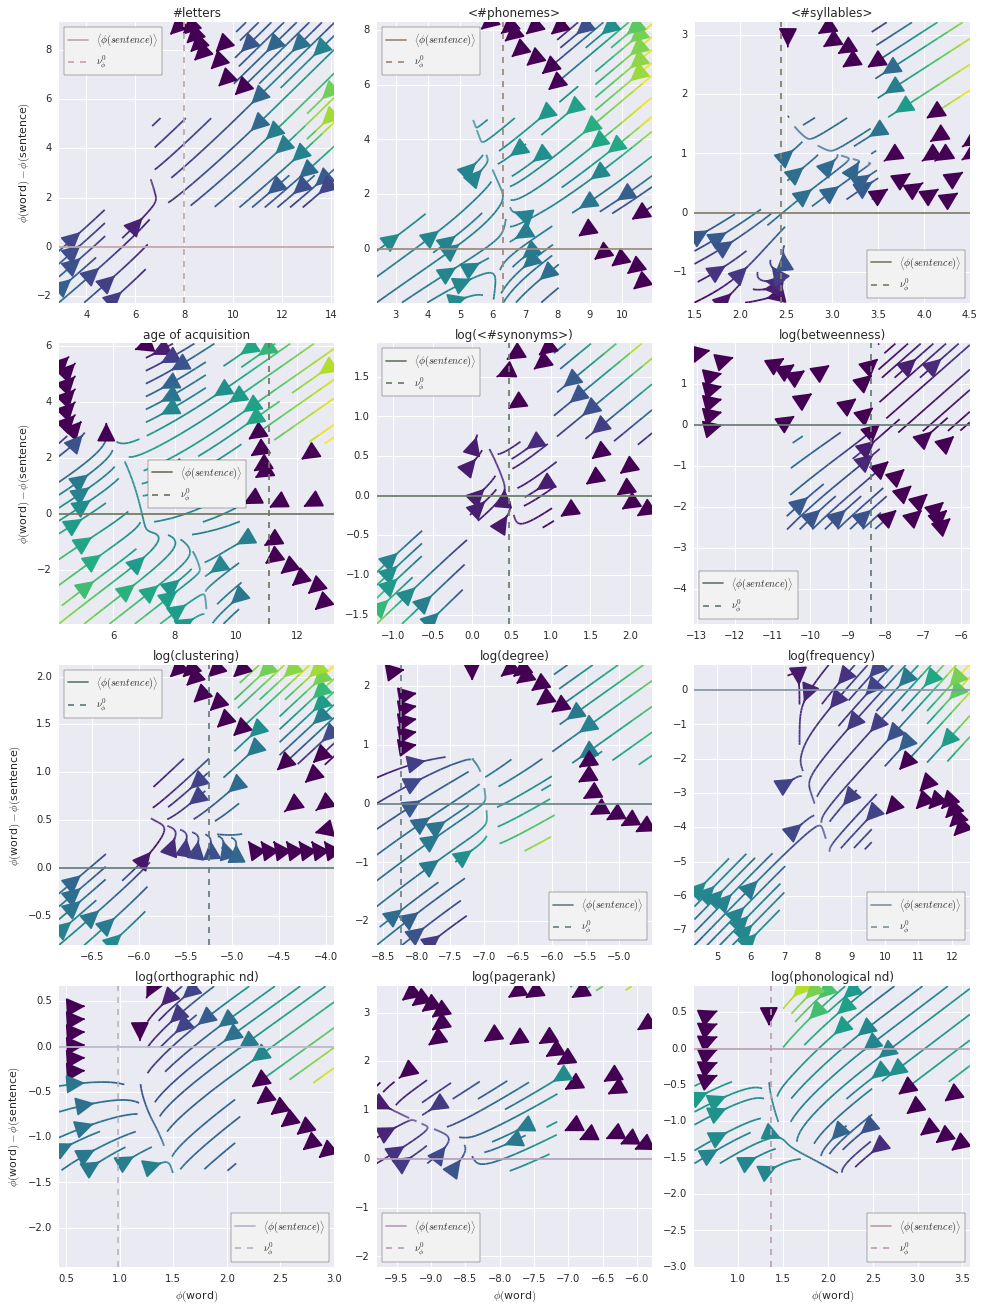

In [28]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4144: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


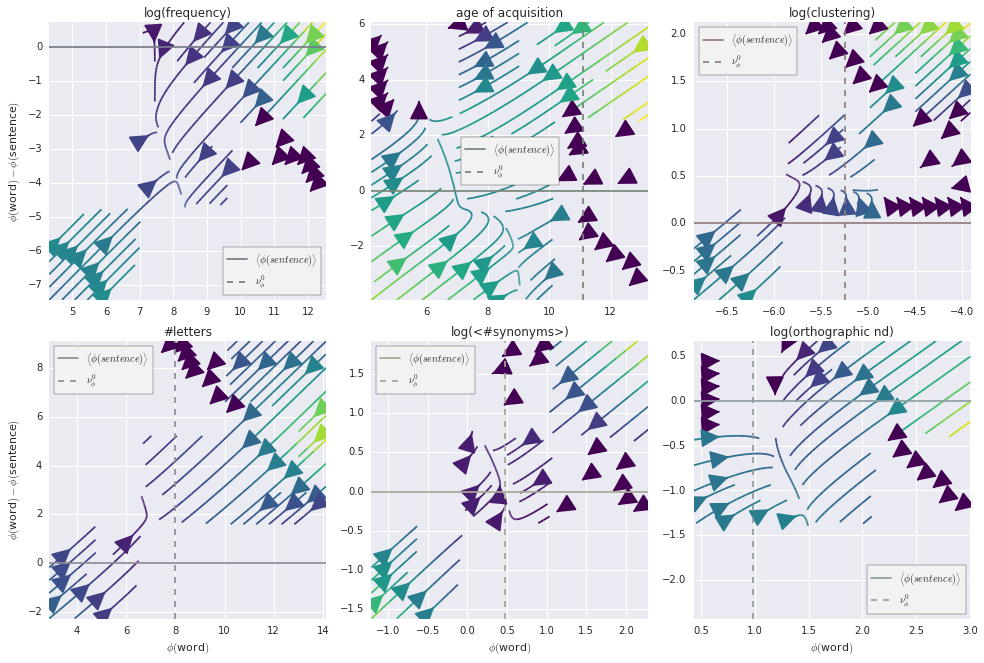

In [29]:
g = sb.FacetGrid(data=variations[variations['feature']
                                 .map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account, changing the values under the null hypotheses.

### 4.1 On all the features

Compute the actual PCA

In [30]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id',
                                 columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:"
      .format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.53352043  0.16495268  0.08614343  0.07743131  0.03606997  0.02582389
  0.02239324  0.01909724  0.0128689   0.01082262]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.489840,0.332932,-0.098602,0.248148,0.258502,-0.410251,0.211155,0.276602,-0.363773,0.258779,-0.149618,-0.002552
Component-1,-0.286201,0.319530,-0.093017,0.254264,0.321245,0.448380,-0.162363,0.291978,0.499387,-0.229951,0.155661,-0.018348
Component-2,-0.746200,-0.287752,0.022277,-0.058305,-0.565024,0.145110,0.029877,-0.077570,0.066310,-0.027218,0.006588,0.063939


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [31]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution\
                .components(component, pca, pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 5600) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (   8 of 5600) |                       | Elapsed Time: 0:00:41 ETA: 8:04:38

  0% (  31 of 5600) |                       | Elapsed Time: 0:00:41 ETA: 2:05:10

  1% (  70 of 5600) |                       | Elapsed Time: 0:00:42 ETA: 1:09:09

  1% (  92 of 5600) |                       | Elapsed Time: 0:00:42 ETA: 0:42:13

  2% ( 119 of 5600) |                       | Elapsed Time: 0:00:42 ETA: 0:00:47

  2% ( 155 of 5600) |                       | Elapsed Time: 0:00:42 ETA: 0:00:42

  3% ( 177 of 5600) |                       | Elapsed Time: 0:00:42 ETA: 0:00:44

  3% ( 199 of 5600) |                       | Elapsed Time: 0:00:43 ETA: 0:00:44

  3% ( 221 of 5600) |                       | Elapsed Time: 0:00:43 ETA: 0:00:46

  4% ( 246 of 5600) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:46

  5% ( 280 of 5600) |#                      | Elapsed Time: 0:00:43 ETA: 0:00:46

  5% ( 306 of 5600) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:44

  5% ( 332 of 5600) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:42

  6% ( 362 of 5600) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:42

  6% ( 385 of 5600) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:42

  7% ( 408 of 5600) |#                      | Elapsed Time: 0:00:44 ETA: 0:00:43

  7% ( 429 of 5600) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:47

  8% ( 454 of 5600) |#                      | Elapsed Time: 0:00:45 ETA: 0:00:47

  8% ( 490 of 5600) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:44

  9% ( 510 of 5600) |##                     | Elapsed Time: 0:00:45 ETA: 0:00:45

  9% ( 529 of 5600) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:45

  9% ( 549 of 5600) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:44

 10% ( 570 of 5600) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:51

 10% ( 590 of 5600) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:55

 10% ( 610 of 5600) |##                     | Elapsed Time: 0:00:46 ETA: 0:00:55

 11% ( 630 of 5600) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:54

 11% ( 649 of 5600) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:54

 11% ( 668 of 5600) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:54

 12% ( 688 of 5600) |##                     | Elapsed Time: 0:00:47 ETA: 0:00:54

 12% ( 710 of 5600) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:53

 13% ( 730 of 5600) |##                     | Elapsed Time: 0:00:48 ETA: 0:00:53

 13% ( 750 of 5600) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:52

 13% ( 770 of 5600) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:52

 14% ( 790 of 5600) |###                    | Elapsed Time: 0:00:48 ETA: 0:00:51

 14% ( 813 of 5600) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:49

 15% ( 840 of 5600) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:45

 15% ( 871 of 5600) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:40

 15% ( 895 of 5600) |###                    | Elapsed Time: 0:00:49 ETA: 0:00:38

 16% ( 921 of 5600) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:38

 16% ( 943 of 5600) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:38

 17% ( 965 of 5600) |###                    | Elapsed Time: 0:00:50 ETA: 0:00:41

 17% ( 996 of 5600) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:41

 18% (1024 of 5600) |####                   | Elapsed Time: 0:00:50 ETA: 0:00:39

 19% (1064 of 5600) |####                   | Elapsed Time: 0:00:51 ETA: 0:00:37

 19% (1094 of 5600) |####                   | Elapsed Time: 0:00:51 ETA: 0:00:34

 20% (1138 of 5600) |####                   | Elapsed Time: 0:00:51 ETA: 0:00:30

 21% (1190 of 5600) |####                   | Elapsed Time: 0:00:51 ETA: 0:00:28

 21% (1224 of 5600) |#####                  | Elapsed Time: 0:00:52 ETA: 0:00:27

 22% (1260 of 5600) |#####                  | Elapsed Time: 0:00:52 ETA: 0:00:25

 23% (1294 of 5600) |#####                  | Elapsed Time: 0:00:52 ETA: 0:00:25

 23% (1330 of 5600) |#####                  | Elapsed Time: 0:00:52 ETA: 0:00:25

 24% (1364 of 5600) |#####                  | Elapsed Time: 0:00:53 ETA: 0:00:25

 25% (1400 of 5600) |#####                  | Elapsed Time: 0:00:53 ETA: 0:00:25

 25% (1415 of 5600) |#####                  | Elapsed Time: 0:00:53 ETA: 0:00:29

 25% (1433 of 5600) |#####                  | Elapsed Time: 0:00:53 ETA: 0:00:33

 25% (1453 of 5600) |#####                  | Elapsed Time: 0:00:53 ETA: 0:00:37

 26% (1480 of 5600) |######                 | Elapsed Time: 0:00:54 ETA: 0:00:43

 26% (1500 of 5600) |######                 | Elapsed Time: 0:00:54 ETA: 0:00:44

 27% (1520 of 5600) |######                 | Elapsed Time: 0:00:54 ETA: 0:00:42

 27% (1540 of 5600) |######                 | Elapsed Time: 0:00:54 ETA: 0:00:42

 27% (1555 of 5600) |######                 | Elapsed Time: 0:00:55 ETA: 0:00:44

 28% (1578 of 5600) |######                 | Elapsed Time: 0:00:55 ETA: 0:00:42

 28% (1610 of 5600) |######                 | Elapsed Time: 0:00:55 ETA: 0:00:39

 29% (1634 of 5600) |######                 | Elapsed Time: 0:00:55 ETA: 0:00:37

 29% (1656 of 5600) |######                 | Elapsed Time: 0:00:55 ETA: 0:00:36

 29% (1672 of 5600) |######                 | Elapsed Time: 0:00:56 ETA: 0:00:35

 30% (1688 of 5600) |######                 | Elapsed Time: 0:00:56 ETA: 0:00:40

 30% (1715 of 5600) |#######                | Elapsed Time: 0:00:56 ETA: 0:00:40

 31% (1750 of 5600) |#######                | Elapsed Time: 0:00:56 ETA: 0:00:39

 31% (1781 of 5600) |#######                | Elapsed Time: 0:00:56 ETA: 0:00:32

 32% (1820 of 5600) |#######                | Elapsed Time: 0:00:57 ETA: 0:00:28

 32% (1841 of 5600) |#######                | Elapsed Time: 0:00:57 ETA: 0:00:29

 33% (1862 of 5600) |#######                | Elapsed Time: 0:00:57 ETA: 0:00:29

 33% (1890 of 5600) |#######                | Elapsed Time: 0:00:57 ETA: 0:00:29

 34% (1921 of 5600) |#######                | Elapsed Time: 0:00:58 ETA: 0:00:29

 35% (1960 of 5600) |########               | Elapsed Time: 0:00:58 ETA: 0:00:29

 35% (1985 of 5600) |########               | Elapsed Time: 0:00:58 ETA: 0:00:27

 35% (2007 of 5600) |########               | Elapsed Time: 0:00:58 ETA: 0:00:27

 36% (2044 of 5600) |########               | Elapsed Time: 0:00:59 ETA: 0:00:28

 37% (2077 of 5600) |########               | Elapsed Time: 0:00:59 ETA: 0:00:27

 37% (2115 of 5600) |########               | Elapsed Time: 0:00:59 ETA: 0:00:27

 38% (2146 of 5600) |########               | Elapsed Time: 0:00:59 ETA: 0:00:24

 39% (2186 of 5600) |########               | Elapsed Time: 0:01:00 ETA: 0:00:23

 39% (2214 of 5600) |#########              | Elapsed Time: 0:01:00 ETA: 0:00:23

 40% (2254 of 5600) |#########              | Elapsed Time: 0:01:00 ETA: 0:00:23

 40% (2275 of 5600) |#########              | Elapsed Time: 0:01:00 ETA: 0:00:25

 40% (2295 of 5600) |#########              | Elapsed Time: 0:01:00 ETA: 0:00:26

 41% (2324 of 5600) |#########              | Elapsed Time: 0:01:01 ETA: 0:00:27

 42% (2358 of 5600) |#########              | Elapsed Time: 0:01:01 ETA: 0:00:26

 42% (2395 of 5600) |#########              | Elapsed Time: 0:01:01 ETA: 0:00:24

 43% (2423 of 5600) |#########              | Elapsed Time: 0:01:01 ETA: 0:00:22

 43% (2450 of 5600) |##########             | Elapsed Time: 0:01:02 ETA: 0:00:21

 44% (2483 of 5600) |##########             | Elapsed Time: 0:01:02 ETA: 0:00:21

 45% (2520 of 5600) |##########             | Elapsed Time: 0:01:02 ETA: 0:00:21

 45% (2538 of 5600) |##########             | Elapsed Time: 0:01:02 ETA: 0:00:23

 45% (2565 of 5600) |##########             | Elapsed Time: 0:01:02 ETA: 0:00:22

 46% (2604 of 5600) |##########             | Elapsed Time: 0:01:03 ETA: 0:00:23

 47% (2632 of 5600) |##########             | Elapsed Time: 0:01:03 ETA: 0:00:23

 47% (2675 of 5600) |##########             | Elapsed Time: 0:01:03 ETA: 0:00:22

 48% (2704 of 5600) |###########            | Elapsed Time: 0:01:03 ETA: 0:00:20

 48% (2742 of 5600) |###########            | Elapsed Time: 0:01:04 ETA: 0:00:20

 49% (2774 of 5600) |###########            | Elapsed Time: 0:01:04 ETA: 0:00:19

 50% (2812 of 5600) |###########            | Elapsed Time: 0:01:04 ETA: 0:00:20

 50% (2836 of 5600) |###########            | Elapsed Time: 0:01:04 ETA: 0:00:20

 51% (2870 of 5600) |###########            | Elapsed Time: 0:01:05 ETA: 0:00:21

 51% (2894 of 5600) |###########            | Elapsed Time: 0:01:05 ETA: 0:00:22

 52% (2919 of 5600) |###########            | Elapsed Time: 0:01:05 ETA: 0:00:23

 52% (2953 of 5600) |############           | Elapsed Time: 0:01:05 ETA: 0:00:22

 53% (2978 of 5600) |############           | Elapsed Time: 0:01:06 ETA: 0:00:22

 53% (3010 of 5600) |############           | Elapsed Time: 0:01:06 ETA: 0:00:21

 54% (3031 of 5600) |############           | Elapsed Time: 0:01:06 ETA: 0:00:21

 54% (3051 of 5600) |############           | Elapsed Time: 0:01:06 ETA: 0:00:22

 55% (3080 of 5600) |############           | Elapsed Time: 0:01:07 ETA: 0:00:21

 55% (3109 of 5600) |############           | Elapsed Time: 0:01:07 ETA: 0:00:20

 56% (3138 of 5600) |############           | Elapsed Time: 0:01:07 ETA: 0:00:20

 56% (3164 of 5600) |############           | Elapsed Time: 0:01:07 ETA: 0:00:19

 56% (3192 of 5600) |#############          | Elapsed Time: 0:01:07 ETA: 0:00:18

 57% (3220 of 5600) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:18

 57% (3246 of 5600) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:19

 58% (3272 of 5600) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:18

 58% (3303 of 5600) |#############          | Elapsed Time: 0:01:08 ETA: 0:00:18

 59% (3327 of 5600) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:18

 60% (3360 of 5600) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:18

 60% (3394 of 5600) |#############          | Elapsed Time: 0:01:09 ETA: 0:00:19

 61% (3416 of 5600) |##############         | Elapsed Time: 0:01:09 ETA: 0:00:19

 61% (3441 of 5600) |##############         | Elapsed Time: 0:01:10 ETA: 0:00:19

 61% (3462 of 5600) |##############         | Elapsed Time: 0:01:10 ETA: 0:00:19

 62% (3500 of 5600) |##############         | Elapsed Time: 0:01:10 ETA: 0:00:18

 63% (3528 of 5600) |##############         | Elapsed Time: 0:01:10 ETA: 0:00:17

 63% (3556 of 5600) |##############         | Elapsed Time: 0:01:10 ETA: 0:00:16

 64% (3585 of 5600) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:15

 64% (3617 of 5600) |##############         | Elapsed Time: 0:01:11 ETA: 0:00:14

 65% (3653 of 5600) |###############        | Elapsed Time: 0:01:11 ETA: 0:00:14

 65% (3676 of 5600) |###############        | Elapsed Time: 0:01:11 ETA: 0:00:15

 66% (3696 of 5600) |###############        | Elapsed Time: 0:01:12 ETA: 0:00:15

 66% (3721 of 5600) |###############        | Elapsed Time: 0:01:12 ETA: 0:00:16

 66% (3749 of 5600) |###############        | Elapsed Time: 0:01:12 ETA: 0:00:17

 67% (3780 of 5600) |###############        | Elapsed Time: 0:01:12 ETA: 0:00:15

 67% (3804 of 5600) |###############        | Elapsed Time: 0:01:13 ETA: 0:00:15

 68% (3825 of 5600) |###############        | Elapsed Time: 0:01:13 ETA: 0:00:14

 68% (3850 of 5600) |###############        | Elapsed Time: 0:01:13 ETA: 0:00:14

 69% (3877 of 5600) |###############        | Elapsed Time: 0:01:13 ETA: 0:00:14

 70% (3920 of 5600) |################       | Elapsed Time: 0:01:13 ETA: 0:00:13

 70% (3936 of 5600) |################       | Elapsed Time: 0:01:14 ETA: 0:00:14

 70% (3963 of 5600) |################       | Elapsed Time: 0:01:14 ETA: 0:00:13

 71% (4003 of 5600) |################       | Elapsed Time: 0:01:14 ETA: 0:00:12

 72% (4035 of 5600) |################       | Elapsed Time: 0:01:14 ETA: 0:00:11

 72% (4060 of 5600) |################       | Elapsed Time: 0:01:15 ETA: 0:00:11

 72% (4081 of 5600) |################       | Elapsed Time: 0:01:15 ETA: 0:00:11

 73% (4110 of 5600) |################       | Elapsed Time: 0:01:15 ETA: 0:00:11

 74% (4146 of 5600) |#################      | Elapsed Time: 0:01:15 ETA: 0:00:10

 74% (4175 of 5600) |#################      | Elapsed Time: 0:01:15 ETA: 0:00:10

 74% (4187 of 5600) |#################      | Elapsed Time: 0:01:16 ETA: 0:00:12

 75% (4215 of 5600) |#################      | Elapsed Time: 0:01:16 ETA: 0:00:12

 75% (4248 of 5600) |#################      | Elapsed Time: 0:01:16 ETA: 0:00:11

 76% (4278 of 5600) |#################      | Elapsed Time: 0:01:16 ETA: 0:00:12

 76% (4297 of 5600) |#################      | Elapsed Time: 0:01:17 ETA: 0:00:12

 77% (4320 of 5600) |#################      | Elapsed Time: 0:01:17 ETA: 0:00:10

 77% (4355 of 5600) |#################      | Elapsed Time: 0:01:17 ETA: 0:00:10

 78% (4387 of 5600) |##################     | Elapsed Time: 0:01:17 ETA: 0:00:09

 79% (4428 of 5600) |##################     | Elapsed Time: 0:01:18 ETA: 0:00:08

 79% (4453 of 5600) |##################     | Elapsed Time: 0:01:18 ETA: 0:00:08

 80% (4480 of 5600) |##################     | Elapsed Time: 0:01:18 ETA: 0:00:08

 80% (4504 of 5600) |##################     | Elapsed Time: 0:01:18 ETA: 0:00:08

 80% (4530 of 5600) |##################     | Elapsed Time: 0:01:18 ETA: 0:00:08

 81% (4562 of 5600) |##################     | Elapsed Time: 0:01:19 ETA: 0:00:08

 81% (4586 of 5600) |##################     | Elapsed Time: 0:01:19 ETA: 0:00:08

 82% (4620 of 5600) |##################     | Elapsed Time: 0:01:19 ETA: 0:00:07

 83% (4655 of 5600) |###################    | Elapsed Time: 0:01:19 ETA: 0:00:06

 83% (4690 of 5600) |###################    | Elapsed Time: 0:01:20 ETA: 0:00:06

 84% (4713 of 5600) |###################    | Elapsed Time: 0:01:20 ETA: 0:00:06

 84% (4740 of 5600) |###################    | Elapsed Time: 0:01:20 ETA: 0:00:06

 85% (4772 of 5600) |###################    | Elapsed Time: 0:01:20 ETA: 0:00:06

 85% (4789 of 5600) |###################    | Elapsed Time: 0:01:20 ETA: 0:00:07

 85% (4809 of 5600) |###################    | Elapsed Time: 0:01:21 ETA: 0:00:07

 86% (4847 of 5600) |###################    | Elapsed Time: 0:01:21 ETA: 0:00:06

 86% (4865 of 5600) |###################    | Elapsed Time: 0:01:21 ETA: 0:00:07

 87% (4884 of 5600) |####################   | Elapsed Time: 0:01:21 ETA: 0:00:07

 87% (4915 of 5600) |####################   | Elapsed Time: 0:01:22 ETA: 0:00:06

 88% (4943 of 5600) |####################   | Elapsed Time: 0:01:22 ETA: 0:00:05

 88% (4982 of 5600) |####################   | Elapsed Time: 0:01:22 ETA: 0:00:05

 89% (5009 of 5600) |####################   | Elapsed Time: 0:01:22 ETA: 0:00:04

 90% (5040 of 5600) |####################   | Elapsed Time: 0:01:23 ETA: 0:00:04

 90% (5069 of 5600) |####################   | Elapsed Time: 0:01:23 ETA: 0:00:04

 90% (5094 of 5600) |####################   | Elapsed Time: 0:01:23 ETA: 0:00:04

 91% (5120 of 5600) |#####################  | Elapsed Time: 0:01:23 ETA: 0:00:03

 91% (5146 of 5600) |#####################  | Elapsed Time: 0:01:23 ETA: 0:00:03

 92% (5180 of 5600) |#####################  | Elapsed Time: 0:01:24 ETA: 0:00:03

 92% (5202 of 5600) |#####################  | Elapsed Time: 0:01:24 ETA: 0:00:03

 93% (5234 of 5600) |#####################  | Elapsed Time: 0:01:24 ETA: 0:00:02

 94% (5267 of 5600) |#####################  | Elapsed Time: 0:01:24 ETA: 0:00:02

 94% (5295 of 5600) |#####################  | Elapsed Time: 0:01:25 ETA: 0:00:02

 95% (5332 of 5600) |#####################  | Elapsed Time: 0:01:25 ETA: 0:00:01

 95% (5363 of 5600) |###################### | Elapsed Time: 0:01:25 ETA: 0:00:01

 96% (5390 of 5600) |###################### | Elapsed Time: 0:01:25 ETA: 0:00:01

 96% (5420 of 5600) |###################### | Elapsed Time: 0:01:25 ETA: 0:00:01

 97% (5460 of 5600) |###################### | Elapsed Time: 0:01:26 ETA: 0:00:01

 98% (5488 of 5600) |###################### | Elapsed Time: 0:01:26 ETA: 0:00:00

 98% (5512 of 5600) |###################### | Elapsed Time: 0:01:26 ETA: 0:00:00

 99% (5545 of 5600) |###################### | Elapsed Time: 0:01:26 ETA: 0:00:00

 99% (5565 of 5600) |###################### | Elapsed Time: 0:01:27 ETA: 0:00:00

100% (5600 of 5600) |######################| Elapsed Time: 0:01:27 Time: 0:01:27


Compute cluster averages (so as not to overestimate confidence intervals).

In [32]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | ns. | *** | *** |
H_00 | ns. | ns. | ns. | *   |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | **  | *** | *** | **  |
H_00 | ns. | *** | *** | *   |

---
2.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | **  | ns. |
H_00 | *   | ns. | ns. | ns. |


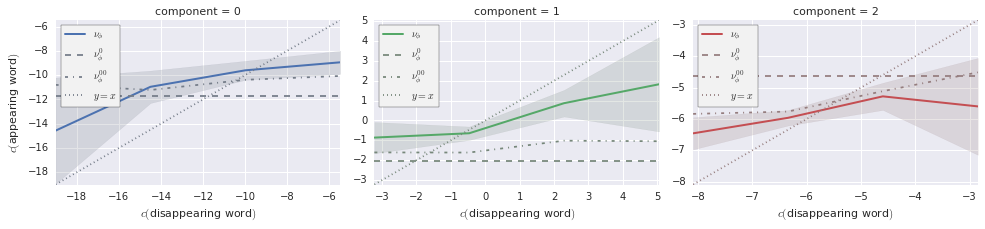

In [33]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On a subset of relevant features

In [34]:
relevant_features = ['frequency', 'aoa', 'letters_count']

Compute the actual PCA

In [35]:
# Compute the PCA.
pcafeatures = tuple(sorted(relevant_features))
pcavariations = variations[variations['feature']
                           .map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

pd.DataFrame(pca.components_,
             columns=pcafeatures,
             index=['Component-{}'.format(i)
                    for i in range(pca.n_components_)])

MLE estimates there are 2 components.

Those explain the following variance:
[ 0.64234754  0.21640136]



,aoa,frequency,letters_count
Component-0,-0.757650,0.349028,-0.551493
Component-1,0.390963,-0.433896,-0.811715


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [36]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(pca.n_components_):
            source, destination = substitution.components(component, pca,
                                                          pcafeatures)
            data.append({
                'cluster_id': substitution.source.cluster.sid,
                'destination_id': substitution.destination.sid,
                'occurrence': substitution.occurrence,
                'position': substitution.position,
                'source_id': substitution.source.sid,
                'component': component,
                'source': source,
                'destination': destination,
                'h0': substitution.component_average(component, pca,
                                                     pcafeatures),
                'h0n': substitution.component_average(component, pca,
                                                      pcafeatures,
                                                      source_synonyms=True)
            })

original_component_variations = pd.DataFrame(data)
del data

  0% (   0 of 5600) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

  0% (  17 of 5600) |                       | Elapsed Time: 0:00:03 ETA: 0:16:46

  0% (  48 of 5600) |                       | Elapsed Time: 0:00:03 ETA: 0:06:19

  1% (  85 of 5600) |                       | Elapsed Time: 0:00:03 ETA: 0:03:48

  2% ( 119 of 5600) |                       | Elapsed Time: 0:00:03 ETA: 0:02:51

  2% ( 157 of 5600) |                       | Elapsed Time: 0:00:03 ETA: 0:00:34

  3% ( 188 of 5600) |                       | Elapsed Time: 0:00:04 ETA: 0:00:34

  4% ( 225 of 5600) |                       | Elapsed Time: 0:00:04 ETA: 0:00:34

  4% ( 257 of 5600) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:34

  5% ( 297 of 5600) |#                      | Elapsed Time: 0:00:04 ETA: 0:00:33

  5% ( 332 of 5600) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:32

  6% ( 367 of 5600) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:32

  7% ( 400 of 5600) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:31

  7% ( 434 of 5600) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:32

  8% ( 471 of 5600) |#                      | Elapsed Time: 0:00:05 ETA: 0:00:32

  8% ( 503 of 5600) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:32

  9% ( 529 of 5600) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:34

 10% ( 560 of 5600) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:35

 10% ( 599 of 5600) |##                     | Elapsed Time: 0:00:06 ETA: 0:00:37

 11% ( 630 of 5600) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:38

 11% ( 656 of 5600) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:38

 12% ( 682 of 5600) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:38

 12% ( 714 of 5600) |##                     | Elapsed Time: 0:00:07 ETA: 0:00:37

 13% ( 739 of 5600) |###                    | Elapsed Time: 0:00:07 ETA: 0:00:38

 13% ( 770 of 5600) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:37

 14% ( 798 of 5600) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:36

 15% ( 840 of 5600) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:34

 15% ( 875 of 5600) |###                    | Elapsed Time: 0:00:08 ETA: 0:00:31

 16% ( 910 of 5600) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:30

 16% ( 938 of 5600) |###                    | Elapsed Time: 0:00:09 ETA: 0:00:29

 17% ( 980 of 5600) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:30

 18% (1015 of 5600) |####                   | Elapsed Time: 0:00:09 ETA: 0:00:30

 18% (1050 of 5600) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:29

 19% (1086 of 5600) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:28

 20% (1140 of 5600) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:25

 21% (1190 of 5600) |####                   | Elapsed Time: 0:00:10 ETA: 0:00:23

 21% (1231 of 5600) |#####                  | Elapsed Time: 0:00:10 ETA: 0:00:22

 22% (1280 of 5600) |#####                  | Elapsed Time: 0:00:11 ETA: 0:00:21

 23% (1330 of 5600) |#####                  | Elapsed Time: 0:00:11 ETA: 0:00:21

 24% (1350 of 5600) |#####                  | Elapsed Time: 0:00:11 ETA: 0:00:21

 25% (1400 of 5600) |#####                  | Elapsed Time: 0:00:13 ETA: 0:01:01

 25% (1425 of 5600) |#####                  | Elapsed Time: 0:00:14 ETA: 0:01:05

 25% (1454 of 5600) |#####                  | Elapsed Time: 0:00:14 ETA: 0:01:11

 26% (1484 of 5600) |######                 | Elapsed Time: 0:00:14 ETA: 0:01:15

 27% (1513 of 5600) |######                 | Elapsed Time: 0:00:14 ETA: 0:00:28

 27% (1553 of 5600) |######                 | Elapsed Time: 0:00:14 ETA: 0:00:29

 28% (1586 of 5600) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:28

 29% (1626 of 5600) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:27

 29% (1656 of 5600) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:26

 30% (1680 of 5600) |######                 | Elapsed Time: 0:00:15 ETA: 0:00:27

 30% (1711 of 5600) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:25

 31% (1750 of 5600) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:26

 31% (1786 of 5600) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:25

 32% (1820 of 5600) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:24

 33% (1848 of 5600) |#######                | Elapsed Time: 0:00:16 ETA: 0:00:23

 33% (1890 of 5600) |#######                | Elapsed Time: 0:00:17 ETA: 0:00:23

 34% (1928 of 5600) |#######                | Elapsed Time: 0:00:17 ETA: 0:00:22

 35% (1977 of 5600) |########               | Elapsed Time: 0:00:17 ETA: 0:00:22

 35% (2007 of 5600) |########               | Elapsed Time: 0:00:17 ETA: 0:00:22

 36% (2048 of 5600) |########               | Elapsed Time: 0:00:18 ETA: 0:00:21

 37% (2100 of 5600) |########               | Elapsed Time: 0:00:18 ETA: 0:00:20

 38% (2136 of 5600) |########               | Elapsed Time: 0:00:18 ETA: 0:00:20

 39% (2189 of 5600) |########               | Elapsed Time: 0:00:18 ETA: 0:00:19

 39% (2223 of 5600) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:19

 40% (2257 of 5600) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:19

 40% (2286 of 5600) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:20

 41% (2329 of 5600) |#########              | Elapsed Time: 0:00:19 ETA: 0:00:19

 42% (2380 of 5600) |#########              | Elapsed Time: 0:00:20 ETA: 0:00:19

 43% (2434 of 5600) |#########              | Elapsed Time: 0:00:20 ETA: 0:00:18

 44% (2470 of 5600) |##########             | Elapsed Time: 0:00:20 ETA: 0:00:17

 45% (2520 of 5600) |##########             | Elapsed Time: 0:00:20 ETA: 0:00:16

 45% (2549 of 5600) |##########             | Elapsed Time: 0:00:20 ETA: 0:00:17

 46% (2590 of 5600) |##########             | Elapsed Time: 0:00:21 ETA: 0:00:17

 46% (2627 of 5600) |##########             | Elapsed Time: 0:00:21 ETA: 0:00:16

 47% (2679 of 5600) |###########            | Elapsed Time: 0:00:21 ETA: 0:00:16

 48% (2730 of 5600) |###########            | Elapsed Time: 0:00:21 ETA: 0:00:16

 49% (2767 of 5600) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:15

 50% (2817 of 5600) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:15

 50% (2851 of 5600) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:15

 51% (2887 of 5600) |###########            | Elapsed Time: 0:00:22 ETA: 0:00:15

 52% (2921 of 5600) |###########            | Elapsed Time: 0:00:23 ETA: 0:00:16

 52% (2957 of 5600) |############           | Elapsed Time: 0:00:23 ETA: 0:00:16

 53% (2991 of 5600) |############           | Elapsed Time: 0:00:23 ETA: 0:00:16

 54% (3026 of 5600) |############           | Elapsed Time: 0:00:23 ETA: 0:00:15

 54% (3058 of 5600) |############           | Elapsed Time: 0:00:23 ETA: 0:00:15

 55% (3099 of 5600) |############           | Elapsed Time: 0:00:24 ETA: 0:00:15

 56% (3137 of 5600) |############           | Elapsed Time: 0:00:24 ETA: 0:00:14

 56% (3169 of 5600) |#############          | Elapsed Time: 0:00:24 ETA: 0:00:14

 57% (3202 of 5600) |#############          | Elapsed Time: 0:00:24 ETA: 0:00:14

 57% (3237 of 5600) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:14

 58% (3271 of 5600) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:14

 59% (3307 of 5600) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:13

 59% (3341 of 5600) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:13

 60% (3377 of 5600) |#############          | Elapsed Time: 0:00:25 ETA: 0:00:13

 60% (3407 of 5600) |#############          | Elapsed Time: 0:00:26 ETA: 0:00:13

 61% (3446 of 5600) |##############         | Elapsed Time: 0:00:26 ETA: 0:00:13

 62% (3500 of 5600) |##############         | Elapsed Time: 0:00:26 ETA: 0:00:13

 63% (3538 of 5600) |##############         | Elapsed Time: 0:00:26 ETA: 0:00:12

 64% (3589 of 5600) |##############         | Elapsed Time: 0:00:27 ETA: 0:00:11

 65% (3640 of 5600) |##############         | Elapsed Time: 0:00:27 ETA: 0:00:10

 65% (3674 of 5600) |###############        | Elapsed Time: 0:00:27 ETA: 0:00:10

 66% (3710 of 5600) |###############        | Elapsed Time: 0:00:27 ETA: 0:00:11

 66% (3743 of 5600) |###############        | Elapsed Time: 0:00:28 ETA: 0:00:11

 67% (3797 of 5600) |###############        | Elapsed Time: 0:00:28 ETA: 0:00:10

 68% (3829 of 5600) |###############        | Elapsed Time: 0:00:28 ETA: 0:00:10

 69% (3867 of 5600) |###############        | Elapsed Time: 0:00:28 ETA: 0:00:10

 70% (3920 of 5600) |################       | Elapsed Time: 0:00:29 ETA: 0:00:09

 70% (3949 of 5600) |################       | Elapsed Time: 0:00:29 ETA: 0:00:09

 71% (3990 of 5600) |################       | Elapsed Time: 0:00:29 ETA: 0:00:09

 71% (4028 of 5600) |################       | Elapsed Time: 0:00:29 ETA: 0:00:08

 72% (4076 of 5600) |################       | Elapsed Time: 0:00:29 ETA: 0:00:08

 73% (4130 of 5600) |################       | Elapsed Time: 0:00:30 ETA: 0:00:08

 74% (4170 of 5600) |#################      | Elapsed Time: 0:00:30 ETA: 0:00:07

 75% (4200 of 5600) |#################      | Elapsed Time: 0:00:30 ETA: 0:00:08

 75% (4238 of 5600) |#################      | Elapsed Time: 0:00:30 ETA: 0:00:08

 76% (4282 of 5600) |#################      | Elapsed Time: 0:00:31 ETA: 0:00:08

 77% (4314 of 5600) |#################      | Elapsed Time: 0:00:31 ETA: 0:00:08

 77% (4358 of 5600) |#################      | Elapsed Time: 0:00:31 ETA: 0:00:07

 78% (4410 of 5600) |##################     | Elapsed Time: 0:00:32 ETA: 0:00:07

 79% (4447 of 5600) |##################     | Elapsed Time: 0:00:32 ETA: 0:00:06

 80% (4498 of 5600) |##################     | Elapsed Time: 0:00:32 ETA: 0:00:06

 81% (4550 of 5600) |##################     | Elapsed Time: 0:00:32 ETA: 0:00:06

 81% (4584 of 5600) |##################     | Elapsed Time: 0:00:33 ETA: 0:00:05

 82% (4641 of 5600) |###################    | Elapsed Time: 0:00:33 ETA: 0:00:05

 83% (4690 of 5600) |###################    | Elapsed Time: 0:00:33 ETA: 0:00:04

 84% (4723 of 5600) |###################    | Elapsed Time: 0:00:33 ETA: 0:00:04

 85% (4760 of 5600) |###################    | Elapsed Time: 0:00:33 ETA: 0:00:04

 85% (4790 of 5600) |###################    | Elapsed Time: 0:00:34 ETA: 0:00:04

 86% (4830 of 5600) |###################    | Elapsed Time: 0:00:34 ETA: 0:00:04

 86% (4863 of 5600) |###################    | Elapsed Time: 0:00:34 ETA: 0:00:04

 87% (4900 of 5600) |####################   | Elapsed Time: 0:00:34 ETA: 0:00:04

 88% (4937 of 5600) |####################   | Elapsed Time: 0:00:35 ETA: 0:00:04

 89% (4988 of 5600) |####################   | Elapsed Time: 0:00:35 ETA: 0:00:03

 90% (5040 of 5600) |####################   | Elapsed Time: 0:00:35 ETA: 0:00:03

 90% (5077 of 5600) |####################   | Elapsed Time: 0:00:35 ETA: 0:00:02

 91% (5126 of 5600) |#####################  | Elapsed Time: 0:00:36 ETA: 0:00:02

 92% (5163 of 5600) |#####################  | Elapsed Time: 0:00:36 ETA: 0:00:02

 92% (5195 of 5600) |#####################  | Elapsed Time: 0:00:36 ETA: 0:00:02

 93% (5232 of 5600) |#####################  | Elapsed Time: 0:00:36 ETA: 0:00:02

 94% (5271 of 5600) |#####################  | Elapsed Time: 0:00:36 ETA: 0:00:01

 95% (5320 of 5600) |#####################  | Elapsed Time: 0:00:37 ETA: 0:00:01

 95% (5357 of 5600) |###################### | Elapsed Time: 0:00:37 ETA: 0:00:01

 96% (5408 of 5600) |###################### | Elapsed Time: 0:00:37 ETA: 0:00:01

 97% (5460 of 5600) |###################### | Elapsed Time: 0:00:38 ETA: 0:00:00

 98% (5497 of 5600) |###################### | Elapsed Time: 0:00:38 ETA: 0:00:00

 99% (5549 of 5600) |###################### | Elapsed Time: 0:00:38 ETA: 0:00:00

 99% (5581 of 5600) |###################### | Elapsed Time: 0:00:38 ETA: 0:00:00

100% (5600 of 5600) |######################| Elapsed Time: 0:00:38 Time: 0:00:38


Compute cluster averages (so as not to overestimate confidence intervals).

In [37]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'position', 'component'],
             as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components


---
0.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | ns. | *** | *** | *** |
H_00 | ns. | *   | *** | *** |

---
1.0
---
Bin  |   1 |   2 |   3 |   4 |
------------------------------
H_0  | *** | *** | *** | *   |
H_00 | *** | *** | *** | ns. |


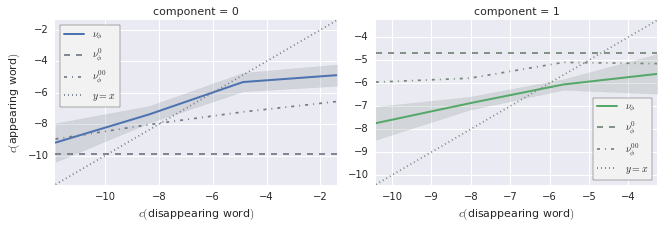

In [38]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, feature_field='component')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `relevant_features`). So note the following:

In [39]:
for feature in relevant_features:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution
                               ._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature)
                 for feature in relevant_features]:
    words.update(tfeature())

data = dict((feature, []) for feature in relevant_features)
words_list = []
for word in words:
    words_list.append(word)
    for feature in relevant_features:
        data[feature].append(Substitution
                             ._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, "
      "only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, "
      "but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'letters_count' is based on 42786 words.



Among all the set of words used by these features, only 14450 are used.

Similarly, we mined 526 (cluster-unique) substitutions, but the PCA is in fact computed on 403 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.

## 5 Interactions between features (by Anova)

Some useful variables first.

In [40]:
cuts = [('fixed bins', pd.cut)]#, ('quantiles', pd.qcut)]
rels = [('global', ''), ('sentence-relative', '_rel')]

def star_level(p):
    if p < .001:
        return '***'
    elif p < .01:
        return ' **'
    elif p < .05:
        return '  *'
    else:
        return 'ns.'

Now for each feature, assess if it has an interaction with the other features' **destination value**. We look at this for all pairs of features, with all pairs of global/sentence-relative value and types of binning (fixed width/quantiles). So it's a lot of answers.

Three stars means $p < .001$, two $p < .01$, one $p < .05$, and `ns.` means non-significative.

In [41]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


   ** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
    * global -> sentence-relative
    * sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative

-> clustering
   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
   ** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global
  *** sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency
  ns. global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa
   ** global -> global
  ns. global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
   ** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


    * global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
    * global -> global
  ns. global -> sentence-relative


    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
    * global -> global
   ** global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa


   ** global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
   ** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
    * global -> global


    * global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative



Now for each feature, look at its interaction with the other features' **variation (i.e. destination - source)**. Same drill, same combinations.

In [42]:
for feature1 in PAPER_FEATURES:
    print('-' * len(feature1))
    print(feature1)
    print('-' * len(feature1))

    for feature2 in PAPER_FEATURES:
        print()
        print('-> {}'.format(feature2))
        for (cut_label, cut), (rel1_label, rel1) in product(cuts, rels):
            for (rel2_label, rel2) in rels:
                source = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel1)[feature1]
                destination = variations.pivot(
                    index='cluster_id', columns='feature',
                    values='destination' + rel2)[feature2]\
                    - variations.pivot(
                    index='cluster_id', columns='feature',
                    values='source' + rel2)[feature2]

                # Compute binning.
                for bin_count in range(BIN_COUNT, 0, -1):
                    try:
                        source_bins = cut(source, bin_count, labels=False)
                        break
                    except ValueError:
                        pass

                _, p = stats.f_oneway(*[destination[source_bins == i]
                                        .dropna()
                                        for i in range(bin_count)])
                print('  {} {} -> {}'
                      .format(star_level(p), rel1_label, rel2_label))
    print()

---------
frequency
---------

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


   ** global -> global
    * global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> clustering
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global


    * sentence-relative -> sentence-relative

---
aoa
---

-> frequency
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> aoa


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  *** global -> global


   ** global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global


  *** global -> sentence-relative
   ** sentence-relative -> global


    * sentence-relative -> sentence-relative

----------
clustering
----------

-> frequency
  *** global -> global
  *** global -> sentence-relative
    * sentence-relative -> global
   ** sentence-relative -> sentence-relative

-> aoa


  ns. global -> global
  ns. global -> sentence-relative
    * sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-------------
letters_count
-------------

-> frequency


   ** global -> global
    * global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global


  ns. global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative


  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

--------------
synonyms_count
--------------

-> frequency


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> aoa
  ns. global -> global


  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> clustering
    * global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> letters_count


  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> synonyms_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> orthographic_density
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

--------------------
orthographic_density
--------------------

-> frequency


   ** global -> global
   ** global -> sentence-relative
    * sentence-relative -> global
    * sentence-relative -> sentence-relative

-> aoa
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> clustering
  ns. global -> global
  ns. global -> sentence-relative
  ns. sentence-relative -> global


  ns. sentence-relative -> sentence-relative

-> letters_count
  *** global -> global


  *** global -> sentence-relative
  *** sentence-relative -> global
  *** sentence-relative -> sentence-relative

-> synonyms_count
  ns. global -> global
  ns. global -> sentence-relative


  ns. sentence-relative -> global
  ns. sentence-relative -> sentence-relative

-> orthographic_density
  *** global -> global
  *** global -> sentence-relative
  *** sentence-relative -> global


  *** sentence-relative -> sentence-relative



Ok, so this can go on for a long time, and I'm not going to look at interactions with this lens (meaning at interaction of couples of features with another feature's destination values).

## 6 Regression

In [43]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [44]:
rels = {False: ('global', ''),
        True: ('rel', '_rel')}

def regress(data, features, target,
            source_rel=False, dest_rel=False, interactions=False):
    if source_rel not in [True, False, 'both']:
        raise ValueError
    if not isinstance(dest_rel, bool):
        raise ValueError
    # Process source/destination relativeness arguments.
    if isinstance(source_rel, bool):
        source_rel = [source_rel]
    else:
        source_rel = [False, True]
    dest_rel_name, dest_rel = rels[dest_rel]
    
    features = tuple(sorted(features))
    feature_tuples = [('source' + rels[rel][1], feature)
                      for rel in source_rel
                      for feature in features]
    feature_names = [rels[rel][0] + '_' + feature
                     for rel in source_rel
                     for feature in features]
    
    # Get source and destination values.
    source = pd.pivot_table(
        data,
        values=['source' + rels[rel][1] for rel in source_rel],
        index=['cluster_id'],
        columns=['feature']
    )[feature_tuples].dropna()
    destination = variations[variations.feature == target]\
        .pivot(index='cluster_id', columns='feature',
               values='destination' + dest_rel)\
        .loc[source.index][target].dropna()
    source = source.loc[destination.index].values
    destination = destination.values

    # If asked to, get polynomial features.
    if interactions:
        poly = PolynomialFeatures(degree=2, interaction_only=True)
        source = poly.fit_transform(source)
        regress_features = [' * '.join([feature_names[j]
                                        for j, p in enumerate(powers)
                                        if p > 0]) or 'intercept'
                            for powers in poly.powers_]
    else:
        regress_features = feature_names

    # Regress.
    linreg = linear_model.LinearRegression(fit_intercept=not interactions)
    linreg.fit(source, destination)

    # And print the score and coefficients.
    print('Regressing {} with {} measures, {} interactions'
          .format(dest_rel_name + ' ' + target, len(source),
                  'with' if interactions else 'no'))
    print('           ' + '^' * len(dest_rel_name + ' ' + target))
    print('R^2 = {}'
          .format(linreg.score(source, destination)))
    print()
    coeffs = pd.Series(index=regress_features, data=linreg.coef_)
    if not interactions:
        coeffs = pd.Series(index=['intercept'], data=[linreg.intercept_])\
            .append(coeffs)
    with pd.option_context('display.max_rows', 999):
        print(coeffs)

In [45]:
for target in PAPER_FEATURES:
    print('-' * 70)
    for source_rel, dest_rel in product([False, True, 'both'],
                                        [False, True]):
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel)
        print()
        regress(variations, PAPER_FEATURES, target, source_rel=source_rel,
                dest_rel=dest_rel, interactions=True)
        print()

----------------------------------------------------------------------
Regressing global frequency with 297 measures, no interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.04643795738756806

intercept                      7.668845
global_aoa                    -0.003175
global_clustering              0.170670
global_frequency               0.274203
global_letters_count          -0.030239
global_orthographic_density   -0.156032
global_synonyms_count         -0.081453
dtype: float64

Regressing global frequency with 297 measures, with interactions
           ^^^^^^^^^^^^^^^^
R^2 = 0.1357244332073516

intercept                                              14.614830
global_aoa                                             -1.159254
global_clustering                                       0.823215
global_frequency                                       -0.146602
global_letters_count                                   -0.439594
global_orthographic_density                             3.710492
global

Regressing rel frequency with 297 measures, no interactions
           ^^^^^^^^^^^^^
R^2 = 0.34774975603855374

intercept                      5.955182
global_aoa                    -0.112044
global_clustering              0.068817
global_frequency              -0.650956
global_letters_count           0.098134
global_orthographic_density    0.050007
global_synonyms_count          0.018145
rel_aoa                        0.130688
rel_clustering                 0.214408
rel_frequency                  0.977123
rel_letters_count             -0.141699
rel_orthographic_density      -0.243203
rel_synonyms_count            -0.092301
dtype: float64

Regressing rel frequency with 297 measures, with interactions
           ^^^^^^^^^^^^^
R^2 = 0.5288549937930357

intercept                                                -91.084659
global_aoa                                                 1.792726
global_clustering                                        -21.520350
global_frequency                   

Regressing global aoa with 274 measures, no interactions
           ^^^^^^^^^^
R^2 = 0.1403523249613121

intercept                      5.544723
global_aoa                     0.433659
global_clustering             -0.015707
global_frequency              -0.247056
global_letters_count           0.172254
global_orthographic_density    0.193019
global_synonyms_count          0.320804
rel_aoa                       -0.200095
rel_clustering                 0.044932
rel_frequency                  0.131474
rel_letters_count             -0.111777
rel_orthographic_density      -0.220202
rel_synonyms_count             0.033088
dtype: float64

Regressing global aoa with 274 measures, with interactions
           ^^^^^^^^^^
R^2 = 0.4893736065187544

intercept                                                 202.785791
global_aoa                                                 -3.861413
global_clustering                                          37.674487
global_frequency                             

Regressing global clustering with 232 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.17162044787322284

intercept                                       -5.746713
rel_aoa                                         -0.045530
rel_clustering                                   0.235181
rel_frequency                                   -0.023618
rel_letters_count                               -0.062815
rel_orthographic_density                         0.063353
rel_synonyms_count                              -0.202292
rel_aoa * rel_clustering                         0.055301
rel_aoa * rel_frequency                         -0.025655
rel_aoa * rel_letters_count                      0.014215
rel_aoa * rel_orthographic_density               0.069416
rel_aoa * rel_synonyms_count                     0.059147
rel_clustering * rel_frequency                   0.028762
rel_clustering * rel_letters_count              -0.034632
rel_clustering * rel_orthographic_density       -0.147273
rel_clus

Regressing rel letters_count with 297 measures, with interactions
           ^^^^^^^^^^^^^^^^^
R^2 = 0.11478060479218331

intercept                                             -17.398193
global_aoa                                              1.550736
global_clustering                                      -2.316515
global_frequency                                        1.946045
global_letters_count                                   -0.190567
global_orthographic_density                            -3.319239
global_synonyms_count                                  -0.132899
global_aoa * global_clustering                          0.195840
global_aoa * global_frequency                          -0.002587
global_aoa * global_letters_count                      -0.062585
global_aoa * global_orthographic_density                0.006766
global_aoa * global_synonyms_count                      0.029243
global_clustering * global_frequency                    0.302872
global_clustering * global_letter

Regressing global synonyms_count with 291 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.13767315928893598

intercept                                             -3.948404
global_aoa                                             0.400996
global_clustering                                     -0.190050
global_frequency                                       0.161289
global_letters_count                                   0.352548
global_orthographic_density                            0.829578
global_synonyms_count                                 -0.296390
global_aoa * global_clustering                         0.025747
global_aoa * global_frequency                         -0.009283
global_aoa * global_letters_count                     -0.022738
global_aoa * global_orthographic_density              -0.040064
global_aoa * global_synonyms_count                     0.058088
global_clustering * global_frequency                  -0.006336
global_clustering * global_letters_cou

Regressing rel synonyms_count with 291 measures, with interactions
           ^^^^^^^^^^^^^^^^^^
R^2 = 0.4987189798320669

intercept                                                 15.034175
global_aoa                                                 0.129886
global_clustering                                          5.189225
global_frequency                                          -0.576173
global_letters_count                                       0.128029
global_orthographic_density                                3.266717
global_synonyms_count                                      2.680272
rel_aoa                                                   -0.108040
rel_clustering                                            -7.315851
rel_frequency                                              0.061113
rel_letters_count                                         -0.353117
rel_orthographic_density                                  -2.573687
rel_synonyms_count                                        -8.

Regressing global orthographic_density with 246 measures, with interactions
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
R^2 = 0.396877479745554

intercept                                                -31.413725
global_aoa                                                 0.348262
global_clustering                                         -6.088490
global_frequency                                           1.420225
global_letters_count                                       0.674832
global_orthographic_density                                1.984340
global_synonyms_count                                      8.206579
rel_aoa                                                   -0.777429
rel_clustering                                             6.144063
rel_frequency                                             -2.091574
rel_letters_count                                         -0.176209
rel_orthographic_density                                  -0.518811
rel_synonyms_count                          